In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='Arial')
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.size'] = 10
import matplotlib.colors as mcolors

import seaborn as sns

import palettable.colorbrewer.sequential as palet

import time
start_time = time.time()
print(time.ctime())

from dynamic_stock_model import DynamicStockModel

#file_path = 'D:\WorkingOn\Co_Cu_Ni\\'
file_path = r'C:\Users\xmuxi\Desktop\2-UCAS\4-Co-Ni-Cu\Data\\'

Mon Nov 24 22:06:46 2025


- population (million persons)

In [2]:
#df_pop = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='Population', index_col=[0], header=2)
df_pop = pd.read_excel(file_path+r'Sector_Cu_Ni_Co\5Regions\by-Cobalt_compile_data.xlsx', sheet_name='Population', index_col=[0], header=2)
df_pop.head(2)

,China,Japan,EU,USA,RoW
Region,,,,,
1900,400.265000,44.103,278.2490,76.391,527.86193
1901,402.520077,44.662,280.5497,77.888,532.84672


In [3]:
Materials = ['Cobalt','Nickel','Copper']

IEA_Scenarios = ['STEPS','APS','NZES']

Regions = ['China','Japan','EU','USA','RoW']
Region_Colors = ['#D62728','#2CA02C','#FF7F0E','#1F77B4','#7F7F7F']

Primary_Scenarios = ['Baseline (SP)','Copper-driven','Laterite Nickel-driven','All carriers-driven']
Secondary_Scenarios = ['Constant','High']
Process_Scenarios = ['Constant','Efficient']
Lifetime_Scenarios = ['Constant','Longer']

Segment_Scenarios = ['Smaller','Baseline']
#Segment_Scenarios = ['Baseline','Smaller','Larger']

Battery_Sizes = ['Larger']
#Battery_Sizes = ['Constant','Larger']

Battery_Scenarios = ['NCX high cobalt','NCX low cobalt','LFP development','Li-S/Air development','Low Cobalt/Nickel development']

Mining_Scenarios = ['Baseline (SP)','Copper-driven','Laterite Nickel-driven','All Carrier-driven']
Mining_Sources = ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel']

Agg_Sectors = ['Building & Infrastructure','Transportation','Industrial Equipment','Metal Goods & Others','B-CEs','B-EVs','B-ESS',]

## Demand: Bottom-up (Emerging use)

In [4]:
Year_Min = 2020

def full_fill(df):
    df_temp = pd.DataFrame(index=np.arange(Year_Min,df.index.min()), columns=df.columns)
    df_temp.fillna(value=0, inplace=True)
    df_output  = pd.concat([df_temp, df])
    
    return df_output

- ESS (kt)

In [5]:
#df_ESS_stock = pd.read_excel(file_path + 'Sector_ESS\\5Regions\ESS_Output.xlsx', sheet_name='material_stock', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_stock = pd.read_excel(file_path + 'Sector_ESS/5Regions/ESS_Output.xlsx', sheet_name='material_stock', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_stock = df_ESS_stock.groupby(['Material','ESS Scenario','Battery Scenario','Lifetime','Region']).sum()
df_ESS_stock = df_ESS_stock.T
df_ESS_stock = full_fill(df_ESS_stock)

#df_ESS_inflow = pd.read_excel(file_path + 'Sector_ESS\\5Regions\ESS_Output.xlsx', sheet_name='material_inflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_inflow = pd.read_excel(file_path + 'Sector_ESS/5Regions/ESS_Output.xlsx', sheet_name='material_inflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_inflow = df_ESS_inflow.groupby(['Material','ESS Scenario','Battery Scenario','Lifetime','Region']).sum()
df_ESS_inflow = df_ESS_inflow.T
df_ESS_inflow = full_fill(df_ESS_inflow)

#df_ESS_outflow = pd.read_excel(file_path + 'Sector_ESS\\5Regions\ESS_Output.xlsx', sheet_name='material_outflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_outflow = pd.read_excel(file_path + 'Sector_ESS/5Regions/ESS_Output.xlsx', sheet_name='material_outflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_outflow = df_ESS_outflow.groupby(['Material','ESS Scenario','Battery Scenario','Lifetime','Region']).sum()
df_ESS_outflow = df_ESS_outflow.T
df_ESS_outflow = full_fill(df_ESS_outflow)

df_ESS_inflow.head(2)

C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no l

Material                  Cobalt                                          \
ESS Scenario                 APS                                           
Battery Scenario LFP development                                           
Lifetime                Constant                                           
Region                     China        EU     Japan       RoW       USA   
2010                    0.006481  0.006481  0.032407  0.055093  0.129630   
2011                    0.011337  0.016705  0.023884  0.011378  0.023966   

Material                                                            ...  \
ESS Scenario                                                        ...   
Battery Scenario                                                    ...   
Lifetime            Longer                                          ...   
Region               China        EU     Japan       RoW       USA  ...   
2010              0.006481  0.006481  0.032407  0.055093  0.129630  ...   
2011              0.011337  0.016705  0.023884  0.011378  0.023966  ...   

Material                 Nickel                                          \
ESS Scenario              STEPS                                           
Battery Scenario NCX low cobalt                                           
Lifetime               Constant                                           
Region                    China        EU     Japan       RoW       USA   
2010                   0.011287  0.011287  0.056435  0.095939  0.225738   
2011                   0.021213  0.031256  0.044689  0.021290  0.044843   

Material                                                            
ESS Scenario                                                        
Battery Scenario                                                    
Lifetime            Longer                                          
Region               China        EU     Japan       RoW       USA  
2010              0.011287  0.011287  0.056435  0.095939  0.225738  
2011              0.021213  0.031256  0.044689  0.021290  0.044843  

[2 rows x 450 columns]

- vehicle: battery material (kt)

In [6]:
#df_Battery_stock = pd.read_excel(file_path + 'Sector_Vehicle\\5Regions\Vehicle_Output.xlsx', sheet_name='battery_material_stock', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_stock = pd.read_excel(file_path + 'Sector_Vehicle/5Regions/Vehicle_Output.xlsx', sheet_name='battery_material_stock', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_stock = df_Battery_stock.groupby(['Material','Powertrain Scenario','Segment Scenario','Battery Size','Battery Scenario','Lifetime','Region']).sum()
df_Battery_stock = df_Battery_stock.T
df_Battery_stock = full_fill(df_Battery_stock)

#df_Battery_inflow = pd.read_excel(file_path + 'Sector_Vehicle\\5Regions\Vehicle_Output.xlsx', sheet_name='battery_material_inflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_inflow = pd.read_excel(file_path + 'Sector_Vehicle/5Regions/Vehicle_Output.xlsx', sheet_name='battery_material_inflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_inflow = df_Battery_inflow.groupby(['Material','Powertrain Scenario','Segment Scenario','Battery Size','Battery Scenario','Lifetime','Region']).sum()
df_Battery_inflow = df_Battery_inflow.T
df_Battery_inflow = full_fill(df_Battery_inflow)

#df_Battery_outflow = pd.read_excel(file_path + 'Sector_Vehicle\\5Regions\Vehicle_Output.xlsx', sheet_name='battery_material_outflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_outflow = pd.read_excel(file_path + 'Sector_Vehicle/5Regions/Vehicle_Output.xlsx', sheet_name='battery_material_outflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_outflow = df_Battery_outflow.groupby(['Material','Powertrain Scenario','Segment Scenario','Battery Size','Battery Scenario','Lifetime','Region']).sum()
df_Battery_outflow = df_Battery_outflow.T
df_Battery_outflow = full_fill(df_Battery_outflow)

df_Battery_inflow.head(2)

C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no l

Material                     Cobalt                                        \
Powertrain Scenario             APS                                         
Segment Scenario           Baseline                                         
Battery Size               Constant                                         
Battery Scenario    LFP development                                         
Lifetime                   Constant                                Longer   
Region                        China        EU Japan  RoW       USA  China   
2005                            0.0  0.004645   0.0  0.0  0.016326    0.0   
2006                            0.0  0.000004   0.0  0.0  0.000014    0.0   

Material                                            ...         Nickel  \
Powertrain Scenario                                 ...          STEPS   
Segment Scenario                                    ...        Smaller   
Battery Size                                        ...         Larger   
Battery Scenario                                    ... NCX low cobalt   
Lifetime                                            ...       Constant   
Region                     EU Japan  RoW       USA  ...          China   
2005                 0.004645   0.0  0.0  0.016326  ...            0.0   
2006                 0.000004   0.0  0.0  0.000014  ...            0.0   

Material                                                                   \
Powertrain Scenario                                                         
Segment Scenario                                                            
Battery Size                                                                
Battery Scenario                                                            
Lifetime                                           Longer                   
Region                     EU Japan  RoW       USA  China        EU Japan   
2005                 0.006546   0.0  0.0  0.023012    0.0  0.006546   0.0   
2006                 0.000005   0.0  0.0  0.000020    0.0  0.000005   0.0   

Material                            
Powertrain Scenario                 
Segment Scenario                    
Battery Size                        
Battery Scenario                    
Lifetime                            
Region               RoW       USA  
2005                 0.0  0.023012  
2006                 0.0  0.000020  

[2 rows x 1800 columns]

## Copper cycle

In [7]:
Cu_Sectors = ['Building & Construction','Infrastructure','Transport','Industrial Equipment','Other Products']

Cu_New_Sectors = ['Building & Construction','Infrastructure','Transport (Exclude B-EVs)','Industrial Equipment','Other Products (Exclude B-ESS)', 'B-ESS', 'B-EVs']
Cu_Old_Sectors = ['Building & Construction','Infrastructure','Transport (Exclude B-EVs)','Industrial Equipment','Other Products (Exclude B-ESS)']
Cu_Agg_Sectors = ['Building & Infrastructure','Transportation','Industrial Equipment','B-CEs','B-EVs','B-ESS',]

## 蓝色系列
Cu_sector_color_dict = {'Building & Construction': '#C6DBEF', 
                     'Infrastructure': '#9ECAE1', 
                     'Building & Infrastructure': '#C6DBEF', 
                     
                     'Transport': '#6BAED6', 
                     'Transport (Exclude B-EVs)': '#6BAED6', 
                     'Transportation': '#6BAED6', 
                     
                     'Industrial Equipment': '#3182BD',
                     
                     'Other Products':'#08519C',  
                     'Other Products (Exclude B-ESS)':'#08519C',
                     
                     'B-CEs': '#FDAE6B',
                     'B-EVs': '#F16913',
                     'B-ESS': '#8C2D04'}

Cu_New_Sector_Colors = [Cu_sector_color_dict[s] for s in Cu_New_Sectors]
Cu_Agg_Sector_Colors = [Cu_sector_color_dict[s] for s in Cu_Agg_Sectors]

- Copper per capita stock (kg/person)

In [8]:
#df_Cu_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Cu_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Cu_per_capita.head(2)

Region                   China                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.023613       0.003528                  0.000589   
1901                  0.048428       0.007235                  0.001208   

Region                                                      \
Sector Industrial Equipment Other Products (Exclude B-ESS)   
1900               0.029575                       0.001739   
1901               0.060648                       0.003566   

Region                   Japan                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.176611       0.122359                  0.040800   
1901                  0.359698       0.249200                  0.083085   

Region                                                      ...  \
Sector Industrial Equipment Other Products (Exclude B-ESS)  ...   
1900               0.119820                       0.050181  ...   
1901               0.244001                       0.102179  ...   

Region                     USA                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.587946       0.475792                  0.275047   
1901                  1.189320       0.962435                  0.556302   

Region                                                      \
Sector Industrial Equipment Other Products (Exclude B-ESS)   
1900               0.312972                       0.180419   
1901               0.633008                       0.364876   

Region                     RoW                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.242349       0.046054                  0.024369   
1901                  0.494913       0.094135                  0.049824   

Region                                                      
Sector Industrial Equipment Other Products (Exclude B-ESS)  
1900               0.027089                       0.018741  
1901               0.055419                       0.038371  

[2 rows x 25 columns]

- lifetime

In [9]:
#df_Cu_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Cu_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Cu_lifetime = df_Cu_lifetime.T
df_Cu_lifetime.head(2)

Lifetime Scenario                Constant                                 \
Sector            Building & Construction Infrastructure B-EVs Transport   
1900                                 40.0           34.0   NaN      17.0   
1901                                 40.0           34.0   NaN      17.0   

Lifetime Scenario                                                       \
Sector            Transport (Exclude B-EVs) Industrial Equipment B-ESS   
1900                                   17.0                 17.0   NaN   
1901                                   17.0                 17.0   NaN   

Lifetime Scenario                                                \
Sector            Other Products Other Products (Exclude B-ESS)   
1900                        13.0                           13.0   
1901                        13.0                           13.0   

Lifetime Scenario                  Longer                                 \
Sector            Building & Construction Infrastructure B-EVs Transport   
1900                                 40.0           34.0   NaN      17.0   
1901                                 40.0           34.0   NaN      17.0   

Lifetime Scenario                                                       \
Sector            Transport (Exclude B-EVs) Industrial Equipment B-ESS   
1900                                   17.0                 17.0   NaN   
1901                                   17.0                 17.0   NaN   

Lifetime Scenario                                                
Sector            Other Products Other Products (Exclude B-ESS)  
1900                        13.0                           13.0  
1901                        13.0                           13.0

- Copper Traditional use 
- stock, inflow, outflow
- million persons * kg/person = kt

In [10]:
def cal_traditional_stock_flow(df_pop, df_capita, df_lt, Old_Sectors):
    
    df_stock = pd.DataFrame(index=df_capita.index, 
                             columns=pd.MultiIndex.from_product([Lifetime_Scenarios,Old_Sectors,Regions],names=['Lifetime','Sector','Region']))
    df_inflow = df_stock.copy()
    df_outflow = df_inflow.copy()
    
    for lt in Lifetime_Scenarios:
        for s in Old_Sectors:
            for r in Regions:
                df_stock[(lt,s,r)] = df_pop[r] * df_capita[r,s]
                ## stock-driven
                DSM = DynamicStockModel(t = list(df_stock.index), 
                                        s = list(df_stock[(lt,s,r)]), 
                                        lt = {'Type': 'Normal',
                                              'Mean': list(df_lt[(lt,s)]),    
                                              'StdDev': list(0.3 * df_lt[(lt,s)])})
                DSM.compute_stock_driven_model()
                DSM.compute_outflow_total()
                ## fill in
                df_inflow[(lt,s,r)] = DSM.i
                df_outflow[(lt,s,r)] = DSM.o
                
    ## 第二轮
    df_inflow_2 = df_inflow.mask(df_inflow<0, 0)
    df_stock_2 = pd.DataFrame(index=df_capita.index, 
                              columns=pd.MultiIndex.from_product([Lifetime_Scenarios,Old_Sectors,Regions],names=['Lifetime','Sector','Region']))
    df_outflow_2 = df_stock_2.copy()
    
    for lt in Lifetime_Scenarios:
        for s in Old_Sectors:
            for r in Regions:
                ## inflow-driven
                DSM = DynamicStockModel(t = list(df_inflow_2.index), 
                                        i = list(df_inflow_2[(lt,s,r)]), 
                                        lt = {'Type': 'Normal',
                                              'Mean': list(df_lt[(lt,s)]),    
                                              'StdDev': list(0.3 * df_lt[(lt,s)])})
                DSM.compute_s_c_inflow_driven()
                DSM.compute_stock_total()
                DSM.compute_o_c_from_s_c()
                DSM.compute_outflow_total()
                ## fill in 
                df_stock_2[(lt,s,r)] = DSM.s
                df_outflow_2[(lt,s,r)] = DSM.o
                
    return df_stock_2, df_inflow_2, df_outflow_2


df_Cu_traditional_stock, df_Cu_traditional_inflow, df_Cu_traditional_outflow = cal_traditional_stock_flow(df_pop, df_Cu_per_capita, df_Cu_lifetime, Cu_Old_Sectors)
df_Cu_traditional_stock = df_Cu_traditional_stock.loc[Year_Min:,:]
df_Cu_traditional_inflow = df_Cu_traditional_inflow.loc[Year_Min:,:]
df_Cu_traditional_outflow = df_Cu_traditional_outflow.loc[Year_Min:,:]
df_Cu_traditional_inflow.head(2)

Lifetime                Constant                                       \
Sector   Building & Construction                                        
Region                     China       Japan          EU          USA   
2020                 2679.908532  313.520256  1618.57227   570.948282   
2021                 7106.757440  135.972393  1351.25044  1347.480006   

Lifetime                                                                   \
Sector                Infrastructure                                        
Region            RoW          China       Japan           EU         USA   
2020      3980.798951    1890.660253   87.433825   314.098298  174.972281   
2021      4292.925241    1224.407971  107.976454  1049.737657  588.815041   

Lifetime               ...               Longer                          \
Sector                 ... Industrial Equipment                           
Region            RoW  ...                China       Japan          EU   
2020      1225.447815  ...          1342.639545  106.810508  233.040469   
2021      1065.301428  ...           503.128917   99.220998  665.702596   

Lifetime                                                                     \
Sector                            Other Products (Exclude B-ESS)              
Region           USA          RoW                          China      Japan   
2020      205.366527   826.276079                    3945.819071  61.100338   
2021      479.701205  1199.180633                       0.000000  72.551118   

Lifetime                                      
Sector                                        
Region            EU         USA         RoW  
2020      427.511310  371.884684  651.157126  
2021      551.630205  332.295060  773.611195  

[2 rows x 50 columns]

- dissipation loss rate

In [11]:
#df_Cu_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Cu_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Cu_dissipation_rate

,Dissipation rate
Sector,
Building & Construction,0.002
Infrastructure,0.006
Transport,0.004
Transport (Exclude B-EVs),0.004
B-EVs,0.004
Industrial Equipment,0.000
Other Products,0.020
Other Products (Exclude B-ESS),0.020
B-ESS,0.020


- loss rate

In [12]:
#df_Cu_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Cu_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Cu_loss_rate = df_Cu_loss_rate.T
df_Cu_loss_rate = df_Cu_loss_rate.loc[Year_Min:,:]
df_Cu_loss_rate.head(2)

Scenario          Constant                                            \
Loss rate mining loss rate benefication loss rate smelting loss rate   
2020               0.06945                 0.1346             0.0129   
2021               0.06945                 0.1346             0.0129   

Scenario                                                                       \
Loss rate refining loss rate fabrication recycling rate fabrication loss rate   
2020                  0.0051                   0.182274              0.005017   
2021                  0.0051                   0.182274              0.005017   

Scenario                                                        \
Loss rate manufacturing recycling rate manufacturing loss rate   
2020                          0.164609                 0.00823   
2021                          0.164609                 0.00823   

Scenario                                                Efficient  \
Loss rate efficiency for recycling EoL loss rate mining loss rate   
2020                         0.014         0.017         0.069450   
2021                         0.014         0.017         0.068755   

Scenario                                                                \
Loss rate benefication loss rate smelting loss rate refining loss rate   
2020                    0.134600           0.012900           0.005100   
2021                    0.133254           0.012771           0.005049   

Scenario                                                    \
Loss rate fabrication recycling rate fabrication loss rate   
2020                        0.182274              0.005017   
2021                        0.180452              0.004967   

Scenario                                                        \
Loss rate manufacturing recycling rate manufacturing loss rate   
2020                          0.164609                0.008230   
2021                          0.162963                0.008148   

Scenario                                          
Loss rate efficiency for recycling EoL loss rate  
2020                       0.01400       0.01700  
2021                       0.01386       0.01683

- collection rate

In [13]:
#df_Cu_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Cu_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Cu_collection_rate = df_Cu_collection_rate.T
df_Cu_collection_rate = df_Cu_collection_rate.loc[Year_Min:,:]
df_Cu_collection_rate.head(2)

Scenario                Constant                           \
Sector   Building & Construction Infrastructure Transport   
2020                        0.55           0.55       0.4   
2021                        0.55           0.55       0.4   

Scenario                                                                      \
Sector   Transport (Exclude B-EVs) B-EVs Industrial Equipment Other Products   
2020                           0.4   0.4                0.325            0.3   
2021                           0.4   0.4                0.325            0.3   

Scenario                                                         High  \
Sector   Other Products (Exclude B-ESS) B-ESS Building & Construction   
2020                                0.3   0.3                  0.5500   
2021                                0.3   0.3                  0.5555   

Scenario                                                            \
Sector   Infrastructure Transport Transport (Exclude B-EVs)  B-EVs   
2020             0.5500     0.400                     0.400  0.400   
2021             0.5555     0.404                     0.404  0.404   

Scenario                                                                     \
Sector   Industrial Equipment Other Products Other Products (Exclude B-ESS)   
2020                  0.32500          0.300                          0.300   
2021                  0.32825          0.303                          0.303   

Scenario         
Sector    B-ESS  
2020      0.300  
2021      0.303

- recycling efficiency

In [14]:
#df_Cu_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0,1], header=2)
df_Cu_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0,1], header=2)
df_Cu_recycling_efficiency = df_Cu_recycling_efficiency.T
df_Cu_recycling_efficiency = df_Cu_recycling_efficiency.loc[Year_Min:,:]
df_Cu_recycling_efficiency.head(2)

Scenario                Constant                           \
Sector   Building & Construction Infrastructure Transport   
2020                       0.862           0.76     0.703   
2021                       0.862           0.76     0.703   

Scenario                                                                       \
Sector   Transport (Exclude B-EVs)  B-EVs Industrial Equipment Other Products   
2020                         0.703  0.703                0.547          0.495   
2021                         0.703  0.703                0.547          0.495   

Scenario                                                          High  \
Sector   Other Products (Exclude B-ESS)  B-ESS Building & Construction   
2020                              0.495  0.495                 0.86200   
2021                              0.495  0.495                 0.87062   

Scenario                                                              \
Sector   Infrastructure Transport Transport (Exclude B-EVs)    B-EVs   
2020             0.7600   0.70300                   0.70300  0.70300   
2021             0.7676   0.71003                   0.71003  0.71003   

Scenario                                                                     \
Sector   Industrial Equipment Other Products Other Products (Exclude B-ESS)   
2020                  0.54700        0.49500                        0.49500   
2021                  0.55247        0.49995                        0.49995   

Scenario           
Sector      B-ESS  
2020      0.49500  
2021      0.49995

## Nickel cycle

In [15]:
Ni_Sectors = ['Building & Infrastructure','Transportation','Industrial Machinery','Applications & Electronics','Metal Goods & Others']
Ni_New_Sectors = ['Building & Infrastructure','Transportation (Exclude B-EVs)','Industrial Machinery','Applications & Electronics (Exclude B-ESS)','Metal Goods & Others','B-ESS','B-EVs']
Ni_Old_Sectors = ['Building & Infrastructure','Transportation (Exclude B-EVs)','Industrial Machinery','Applications & Electronics (Exclude B-ESS)','Metal Goods & Others']
Ni_Agg_Sectors = ['Building & Infrastructure','Transportation','Industrial Equipment','Metal Goods & Others','B-CEs','B-EVs','B-ESS',]

## 绿色系
Ni_sector_color_dict = {'Building & Infrastructure': '#D9F0A3', 
                        
                    'Transportation': '#ADDD8E', 
                    'Transportation (Exclude B-EVs)': '#ADDD8E', 
                        
                    'Industrial Machinery': '#78C679', 
                    'Industrial Equipment': '#78C679', 
                        
                    'Applications & Electronics':'#31A354', 
                    'Applications & Electronics (Exclude B-ESS)':'#31A354', 
                        
                    'Metal Goods & Others':'#006837', 
                        
                    'Power Plant': '#BCBDDC',
                     
                    'B-CEs': '#FDAE6B',
                    'B-EVs': '#F16913',
                    'B-ESS': '#8C2D04',}

Ni_New_Sector_Colors = [Ni_sector_color_dict[s] for s in Ni_New_Sectors]
Ni_Agg_Sector_Colors = [Ni_sector_color_dict[s] for s in Ni_Agg_Sectors]

- Nickel per capita (kg/person)

In [16]:
#df_Ni_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Ni_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Ni_per_capita.head(2)

Region                     China                                 \
Sector Building & Infrastructure Transportation (Exclude B-EVs)   
1900                    0.000070                       0.000061   
1901                    0.000156                       0.000135   

Region                                                                  \
Sector Industrial Machinery Applications & Electronics (Exclude B-ESS)   
1900               0.000158                                   0.000092   
1901               0.000349                                   0.000205   

Region                                          Japan  \
Sector Metal Goods & Others Building & Infrastructure   
1900               0.000093                  0.001285   
1901               0.000207                  0.002825   

Region                                                      \
Sector Transportation (Exclude B-EVs) Industrial Machinery   
1900                         0.000771             0.001370   
1901                         0.001695             0.003014   

Region                                                                  ...  \
Sector Applications & Electronics (Exclude B-ESS) Metal Goods & Others  ...   
1900                                     0.002141             0.000767  ...   
1901                                     0.004708             0.001686  ...   

Region                       USA                                 \
Sector Building & Infrastructure Transportation (Exclude B-EVs)   
1900                    0.003227                       0.011697   
1901                    0.007048                       0.025545   

Region                                                                  \
Sector Industrial Machinery Applications & Electronics (Exclude B-ESS)   
1900               0.010488                                   0.006857   
1901               0.022906                                   0.014975   

Region                                            RoW  \
Sector Metal Goods & Others Building & Infrastructure   
1900               0.008027                  0.000942   
1901               0.017530                  0.002079   

Region                                                      \
Sector Transportation (Exclude B-EVs) Industrial Machinery   
1900                         0.000895             0.001088   
1901                         0.001973             0.002401   

Region                                                                  
Sector Applications & Electronics (Exclude B-ESS) Metal Goods & Others  
1900                                     0.000713             0.000780  
1901                                     0.001572             0.001721  

[2 rows x 25 columns]

- lifetime

In [17]:
#df_Ni_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Ni_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Ni_lifetime = df_Ni_lifetime.T
df_Ni_lifetime.head(2)

Scenario                  Constant                 \
Sector   Building & Infrastructure Transportation   
1900                          50.0           18.0   
1901                          50.0           18.0   

Scenario                                                            \
Sector   Transportation (Exclude B-EVs) B-EVs Industrial Machinery   
1900                               18.0   NaN                 25.0   
1901                               18.0   NaN                 25.0   

Scenario                             \
Sector   Applications & Electronics   
1900                           15.0   
1901                           15.0   

Scenario                                                   \
Sector   Applications & Electronics (Exclude B-ESS) B-ESS   
1900                                           15.0   NaN   
1901                                           15.0   NaN   

Scenario                                         Longer                 \
Sector   Metal Goods & Others Building & Infrastructure Transportation   
1900                     15.0                      50.0           18.0   
1901                     15.0                      50.0           18.0   

Scenario                                                            \
Sector   Transportation (Exclude B-EVs) B-EVs Industrial Machinery   
1900                               18.0   NaN                 25.0   
1901                               18.0   NaN                 25.0   

Scenario                             \
Sector   Applications & Electronics   
1900                           15.0   
1901                           15.0   

Scenario                                                                        
Sector   Applications & Electronics (Exclude B-ESS) B-ESS Metal Goods & Others  
1900                                           15.0   NaN                 15.0  
1901                                           15.0   NaN                 15.0

- Nickel Traditional use 
- stock, inflow, outflow
- million persons * kg/person = kt

In [18]:
df_Ni_traditional_stock, df_Ni_traditional_inflow, df_Ni_traditional_outflow = cal_traditional_stock_flow(df_pop, df_Ni_per_capita, df_Ni_lifetime, Ni_Old_Sectors)
df_Ni_traditional_stock = df_Ni_traditional_stock.loc[Year_Min:,:]
df_Ni_traditional_stock = df_Ni_traditional_stock.loc[Year_Min:,:]
df_Ni_traditional_stock = df_Ni_traditional_stock.loc[Year_Min:,:]
df_Ni_traditional_stock.head(2)

Lifetime                  Constant                                       \
Sector   Building & Infrastructure                                        
Region                       China       Japan           EU         USA   
2020                   1351.903187  923.631007  3280.575827  568.916347   
2021                   1457.494621  914.620280  3366.887308  627.970819   

Lifetime                                                                       \
Sector                Transportation (Exclude B-EVs)                            
Region            RoW                          China       Japan           EU   
2020      3741.687002                    1529.910007  252.104938  1013.020565   
2021      4072.264412                    1562.057866  248.462270  1035.991551   

Lifetime                           ...  \
Sector                             ...   
Region           USA          RoW  ...   
2020      830.772233  2529.486540  ...   
2021      837.056772  2612.738156  ...   

Lifetime                                     Longer                          \
Sector   Applications & Electronics (Exclude B-ESS)                           
Region                                        China       Japan          EU   
2020                                    1721.021133  580.036325  595.008398   
2021                                    1779.310995  547.921563  643.557551   

Lifetime                                                            \
Sector                            Metal Goods & Others               
Region           USA          RoW                China       Japan   
2020      398.391066  1790.854517          4691.593541  208.297027   
2021      429.760213  1875.345130          4611.141206  216.696012   

Lifetime                                       
Sector                                         
Region            EU         USA          RoW  
2020      548.834151  442.777698  2138.302852  
2021      602.682523  481.643157  2216.854769  

[2 rows x 50 columns]

- dissipation loss rate

In [19]:
#df_Ni_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Ni_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Ni_dissipation_rate.fillna(0, inplace=True)
df_Ni_dissipation_rate

,Dissipation rate
Sector,
Building & Infrastructure,0.0001
Transportation,0.0001
Transportation (Exclude B-EVs),0.0001
B-EVs,0.0001
Industrial Machinery,0.0000
Applications & Electronics,0.0000
Applications & Electronics (Exclude B-ESS),0.0000
B-ESS,0.0000
Metal Goods & Others,0.0050


- loss rate

In [20]:
#df_Ni_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Ni_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Ni_loss_rate = df_Ni_loss_rate.T
df_Ni_loss_rate = df_Ni_loss_rate.loc[Year_Min:,:]
df_Ni_loss_rate.head(2)

Scenario          Constant                                        \
Loss rate mining loss rate smelting loss rate refining loss rate   
2020              0.143398           0.056408           0.043997   
2021              0.143398           0.056408           0.043997   

Scenario                                                    \
Loss rate fabrication loss rate fabrication recycling rate   
2020                     0.0008                     0.0042   
2021                     0.0008                     0.0042   

Scenario                                                        \
Loss rate manufacturing loss rate manufacturing recycling rate   
2020                     0.008131                     0.042689   
2021                     0.008131                     0.042689   

Scenario         Efficient                                        \
Loss rate mining loss rate smelting loss rate refining loss rate   
2020              0.143398           0.056408           0.043997   
2021              0.136228           0.053588           0.041797   

Scenario                                                    \
Loss rate fabrication loss rate fabrication recycling rate   
2020                    0.00080                     0.0042   
2021                    0.00076                     0.0042   

Scenario                                                        
Loss rate manufacturing loss rate manufacturing recycling rate  
2020                     0.008131                     0.042689  
2021                     0.007725                     0.042689

- collection rate

In [21]:
#df_Ni_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Ni_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Ni_collection_rate = df_Ni_collection_rate.T
df_Ni_collection_rate = df_Ni_collection_rate.loc[Year_Min:,:]
df_Ni_collection_rate.head(2)

Scenario                  Constant                 \
Sector   Building & Infrastructure Transportation   
2020                          0.87           0.74   
2021                          0.87           0.74   

Scenario                                                            \
Sector   Transportation (Exclude B-EVs) B-EVs Industrial Machinery   
2020                               0.74  0.74                 0.87   
2021                               0.74  0.74                 0.87   

Scenario                             \
Sector   Applications & Electronics   
2020                           0.39   
2021                           0.39   

Scenario                                                   \
Sector   Applications & Electronics (Exclude B-ESS) B-ESS   
2020                                           0.39  0.39   
2021                                           0.39  0.39   

Scenario                                           High                 \
Sector   Metal Goods & Others Building & Infrastructure Transportation   
2020                     0.29                    0.8700         0.7400   
2021                     0.29                    0.8787         0.7474   

Scenario                                                              \
Sector   Transportation (Exclude B-EVs)   B-EVs Industrial Machinery   
2020                             0.7400  0.7400               0.8700   
2021                             0.7474  0.7474               0.8787   

Scenario                             \
Sector   Applications & Electronics   
2020                         0.3900   
2021                         0.3939   

Scenario                                                     \
Sector   Applications & Electronics (Exclude B-ESS)   B-ESS   
2020                                         0.3900  0.3900   
2021                                         0.3939  0.3939   

Scenario                       
Sector   Metal Goods & Others  
2020                   0.2900  
2021                   0.2929

- recycling efficiency

In [22]:
#df_Ni_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0], header=2)
df_Ni_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0], header=2)
df_Ni_recycling_efficiency = df_Ni_recycling_efficiency.T
df_Ni_recycling_efficiency = df_Ni_recycling_efficiency.loc[Year_Min:,:]
df_Ni_recycling_efficiency.head(2)

Scenario,Constant,High
2020,0.84,0.8400
2021,0.84,0.8484


## Cobalt cycle

In [23]:
Co_Sectors = ['Battery','S&A','C&C','MAG','CAT','PI&E','OTH']
Co_New_Sectors = ['S&A','C&C','MAG','CAT','PI&E','OTH','B-CEs','B-ESS','B-EVs']
Co_Old_Sectors = ['S&A','C&C','MAG','CAT','PI&E','OTH','B-CEs']
Co_Agg_Sectors = ['Metal Goods & Others','B-CEs','B-EVs','B-ESS']

## 橘色系
Co_sector_color_dict = {'S&A': '#FDD0A2',
                     'C&C': '#FDAE6B',
                     'MAG': '#FD8D3C',
                     'CAT': '#F16913',
                     'PI&E': '#D94801',
                     'OTH': '#8C2D04', 
                     
                     'Metal Goods & Others':'#FDD0A2', 
                     
                     'B-CEs': '#FDAE6B',  #CBC9E2 原来的紫色
                     'B-EVs': '#F16913',  #9E9AC8
                     'B-ESS': '#8C2D04',  }  #6A51A3

Co_New_Sector_Colors = [Co_sector_color_dict[s] for s in Co_New_Sectors]
Co_Agg_Sector_Colors = [Co_sector_color_dict[s] for s in Co_Agg_Sectors]

- lifetime

In [24]:
#df_Co_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=[2])
df_Co_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=[2])
df_Co_lifetime = df_Co_lifetime.T
df_Co_lifetime.head(2)

Lifetime Constant                                                  Longer  \
Sector    Battery B-EVs B-ESS B-CEs  S&A  C&C  MAG  CAT PI&E  OTH Battery   
1988          NaN   NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0     NaN   
1989          NaN   NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0     NaN   

Lifetime                                                  
Sector   B-EVs B-ESS B-CEs  S&A  C&C  MAG  CAT PI&E  OTH  
1988       NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0  
1989       NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0

- Cobalt per capita (kg/1000 persons)

In [25]:
#df_Co_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Co_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Co_per_capita.head(2)

Region     China                                                              \
Sector     B-CEs       S&A       C&C       MAG       CAT      PI&E       OTH   
1988    1.095277  0.061929  0.337932  0.240332  0.163501  0.291692  0.219066   
1989    2.095722  0.118918  0.478514  0.459840  0.314449  0.559778  0.314087   

Region      Japan                      ...       RoW                      \
Sector      B-CEs       S&A       C&C  ...     B-CEs       S&A       C&C   
1988    16.927567  4.382129  2.490613  ...  0.155384  0.195808  0.110768   
1989    32.661502  8.603550  3.533399  ...  0.298040  0.452493  0.167033   

Region                                                            
Sector       MAG       CAT      PI&E       OTH OTH.1 OTH.2 OTH.3  
1988    0.060130  0.066654  0.085168  0.204656   NaN   NaN   NaN  
1989    0.123167  0.129424  0.183068  0.291805   NaN   NaN   NaN  

[2 rows x 38 columns]

- Cobalt Traditional use 
- stock, inflow, outflow
- million persons * kg/1000 persons = t
- from t to kt

In [26]:
df_Co_traditional_stock, df_Co_traditional_inflow, df_Co_traditional_outflow = cal_traditional_stock_flow(df_pop, df_Co_per_capita, df_Co_lifetime, Co_Old_Sectors)

df_Co_traditional_stock = df_Co_traditional_stock / 1e3  # from t to kt 
df_Co_traditional_inflow = df_Co_traditional_inflow / 1e3  # from t to kt 
df_Co_traditional_outflow = df_Co_traditional_outflow / 1e3  # from t to kt 

df_Co_traditional_stock = df_Co_traditional_stock.loc[Year_Min:,:]
df_Co_traditional_stock = df_Co_traditional_stock.loc[Year_Min:,:]
df_Co_traditional_stock = df_Co_traditional_stock.loc[Year_Min:,:]
df_Co_traditional_inflow.head(2)

Lifetime  Constant                                                    \
Sector         S&A                                               C&C   
Region       China     Japan        EU       USA       RoW     China   
1988      0.068601  0.537383  0.219835  2.100980  0.611184  0.374339   
1989      0.065393  0.523730  0.311432  1.479629  0.833556  0.350992   

Lifetime                                          ...    Longer            \
Sector                                            ...       OTH             
Region       Japan        EU       USA       RoW  ...     China     Japan   
1988      0.305425  0.182590  0.563945  0.345745  ...  0.242667  0.546020   
1989      0.282260  0.208712  0.479508  0.359596  ...  0.231906  0.521777   

Lifetime                                                                   \
Sector                                     B-CEs                            
Region          EU       USA       RoW     China     Japan        EU  USA   
1988      0.482505  1.470429  0.638801  1.213274  2.075838  0.026833  0.0   
1989      0.556455  1.276972  0.610809  1.159455  1.971891  0.034109  0.0   

Lifetime            
Sector              
Region         RoW  
1988      0.485007  
1989      0.471382  

[2 rows x 70 columns]

- loss rate

In [27]:
#df_Co_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1,2], header=[2])
df_Co_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1,2], header=[2])
df_Co_loss_rate = df_Co_loss_rate.T
df_Co_loss_rate = df_Co_loss_rate.loc[Year_Min:,:]
df_Co_loss_rate.head(2)

Scenario  Constant                                                             \
Stage       Mining Refining Manufacturing                                       
Loss rate      All      All       Battery B-EVs B-ESS B-CEs   S&A   C&C   MAG   
2020          0.35      0.1          0.01  0.01  0.01  0.01  0.16  0.01  0.02   
2021          0.35      0.1          0.01  0.01  0.01  0.01  0.16  0.01  0.02   

Scenario         ...     Efficient                                          \
Stage            ... Manufacturing                                           
Loss rate   CAT  ...       Battery   B-EVs   B-ESS   B-CEs     S&A     C&C   
2020       0.05  ...        0.0100  0.0100  0.0100  0.0100  0.1600  0.0100   
2021       0.05  ...        0.0099  0.0099  0.0099  0.0099  0.1584  0.0099   

Scenario                                   
Stage                                      
Loss rate     MAG     CAT    PI&E     OTH  
2020       0.0200  0.0500  0.0100  0.0100  
2021       0.0198  0.0495  0.0099  0.0099  

[2 rows x 24 columns]

- recycling rate

In [28]:
#df_Co_recycling_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='recycling rate', index_col=[0,1,2], header=[2])
df_Co_recycling_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='recycling rate', index_col=[0,1,2], header=[2])
df_Co_recycling_rate = df_Co_recycling_rate.T
df_Co_recycling_rate = df_Co_recycling_rate.loc[Year_Min:,:]
df_Co_recycling_rate.head(2)

Scenario                   Constant                                         \
Recycling New scrap generation rate                                          
Sector                      Battery B-EVs B-ESS B-CEs   S&A  C&C  MAG  CAT   
2020                           0.01  0.01  0.01  0.01  0.79  0.0  0.1  0.0   
2021                           0.01  0.01  0.01  0.01  0.79  0.0  0.1  0.0   

Scenario             ...               High                                    \
Recycling            ... EoL recycling rate                                     
Sector    PI&E  OTH  ...            Battery  B-EVs  B-ESS B-CEs   S&A     C&C   
2020       0.0  0.0  ...               0.20  0.500  0.300  0.20  0.80  0.4500   
2021       0.0  0.0  ...               0.21  0.525  0.315  0.21  0.84  0.4725   

Scenario                         
Recycling                        
Sector       MAG  CAT PI&E  OTH  
2020       0.100  0.0  0.0  0.0  
2021       0.105  0.0  0.0  0.0  

[2 rows x 60 columns]

## By production

In [29]:
#df_Primary_Baseline = pd.read_excel(file_path + 'Sector_Mining\Deposit_SP\Mining_Scenarios.xlsx',sheet_name='Baseline', header=1, index_col=[0])
df_Primary_Baseline = pd.read_excel(file_path + 'Sector_Mining/Deposit_SP/Mining_Scenarios.xlsx',sheet_name='Baseline', header=1, index_col=[0])
df_Primary_Baseline = df_Primary_Baseline / 1e3  ## from t to kt
df_Primary_Baseline = df_Primary_Baseline.loc[Year_Min:,:]
df_Primary_Baseline.head(2)

,Total,Cobalt_from_Cobalt,Cobalt_from_Copper,Cobalt_from_Sulfide_Nickel,Cobalt_from_Laterite_Nickel
Year,,,,,
2020,142.0,9.558318,98.341077,11.845554,22.255051
2021,165.0,8.935280,118.791329,12.879554,24.393837


In [30]:
#df_Nickel_Source = pd.read_excel(file_path + 'Sector_Mining\Deposit_SP\Mining_Scenarios.xlsx',sheet_name='Nickel', header=2, index_col=[0])
df_Nickel_Source = pd.read_excel(file_path + 'Sector_Mining/Deposit_SP/Mining_Scenarios.xlsx',sheet_name='Nickel', header=2, index_col=[0])
df_Nickel_Source = df_Nickel_Source.loc[Year_Min:,:]
df_Nickel_Source.head(2)

,Sulfide Nickel,Laterite Nickel
Year,,
2020,0.287097,0.712903
2021,0.284194,0.715806


## All Scenarios
- All inflows, outflows, stocks (kt)
### 人工测试

In [31]:
def rename_sector(row):
    
    if row.Material == 'Copper':
        if row.Sector in ['B-ESS','B-EVs','Industrial Equipment']:
            return row.Sector
        elif row.Sector in ['Building & Construction', 'Infrastructure']:
            return 'Building & Infrastructure'
        elif row.Sector == 'Transport (Exclude B-EVs)':
            return 'Transportation'
        elif row.Sector == 'Other Products (Exclude B-ESS)':
            return 'B-CEs'
        
    elif row.Material == 'Nickel':
        if row.Sector in ['B-ESS','B-EVs','Building & Infrastructure','Metal Goods & Others']:
            return row.Sector
        elif row.Sector == 'Transportation (Exclude B-EVs)':
            return 'Transportation'
        elif row.Sector == 'Industrial Machinery':
            return 'Industrial Equipment'
        elif row.Sector == 'Applications & Electronics (Exclude B-ESS)':
            return 'B-CEs'
        
    elif row.Material == 'Cobalt':
        if row.Sector in ['B-ESS','B-EVs','B-CEs']:
            return row.Sector
        else:
            return 'Metal Goods & Others'
        
        
def reconstruct_sector(df):
    df = df.copy()
    
    df = df.T.reset_index(drop=False)
    
    df.Sector = df.apply(rename_sector, axis=1)
    df = df.groupby(['Material','Sector','Region']).sum().T
    
    return df

In [32]:
def extract_all_sectors(flow, lt, d_sce, seg_sce, b_size, b_sce):
    
    ################################## Copper
    df_copper = pd.DataFrame(index=np.arange(Year_Min, 2050+1), 
                             columns=pd.MultiIndex.from_product([['Copper'],Cu_New_Sectors,Regions],
                                                                names=['Material','Sector','Region']))
    # fill traditional use
    for s in Cu_Old_Sectors:
        for r in Regions:
            if flow == 'Inflow':
                ## Lifetime, Sector, Region
                df_copper[('Copper',s,r)] = df_Cu_traditional_inflow[(lt,s,r)]
            elif flow == 'Outflow':
                df_copper[('Copper',s,r)] = df_Cu_traditional_outflow[(lt,s,r)]
            elif flow == 'Stock':
                df_copper[('Copper',s,r)] = df_Cu_traditional_stock[(lt,s,r)]
    # fill ESS
    for r in Regions:
        ## Material, ESS Scenario, Battery Scenario, Lifetime, Region
        if flow == 'Inflow':
            df_copper[('Copper','B-ESS',r)] = df_ESS_inflow[('Copper',d_sce,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_copper[('Copper','B-ESS',r)] = df_ESS_outflow[('Copper',d_sce,b_sce,lt,r)]
        elif flow == 'Stock':
            df_copper[('Copper','B-ESS',r)] = df_ESS_stock[('Copper',d_sce,b_sce,lt,r)]
    # fill battery
    for r in Regions:
        ## Material, Powertrain Scenario, Segment Scenario, Battery Size, Battery Scenario, Lifetime ,Region
        if flow == 'Inflow':
            df_copper[('Copper','B-EVs',r)] = df_Battery_inflow[('Copper',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_copper[('Copper','B-EVs',r)] = df_Battery_outflow[('Copper',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Stock':
            df_copper[('Copper','B-EVs',r)] = df_Battery_stock[('Copper',d_sce,seg_sce,b_size,b_sce,lt,r)]
                
    ################################## Nickel
    df_nickel = pd.DataFrame(index=np.arange(Year_Min, 2050+1), 
                             columns=pd.MultiIndex.from_product([['Nickel'],Ni_New_Sectors,Regions],
                                                                names=['Material','Sector','Region']))
    # fill traditional use
    for s in Ni_Old_Sectors:
        for r in Regions:
            if flow == 'Inflow':
                df_nickel[('Nickel',s,r)] = df_Ni_traditional_inflow[(lt,s,r)]
            elif flow == 'Outflow':
                df_nickel[('Nickel',s,r)] = df_Ni_traditional_outflow[(lt,s,r)]
            elif flow == 'Stock':
                df_nickel[('Nickel',s,r)] = df_Ni_traditional_stock[(lt,s,r)]
    # fill ESS
    for r in Regions:
        ## Material, ESS Scenario, Battery Scenario, Lifetime, Region
        if flow == 'Inflow':
            df_nickel[('Nickel','B-ESS',r)] = df_ESS_inflow[('Nickel',d_sce,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_nickel[('Nickel','B-ESS',r)] = df_ESS_outflow[('Nickel',d_sce,b_sce,lt,r)]
        elif flow == 'Stock':
            df_nickel[('Nickel','B-ESS',r)] = df_ESS_stock[('Nickel',d_sce,b_sce,lt,r)]
    # fill battery
    for r in Regions:
        ## Material, Powertrain Scenario, Segment Scenario, Battery Size, Battery Scenario, Lifetime ,Region
        if flow == 'Inflow':
            df_nickel[('Nickel','B-EVs',r)] = df_Battery_inflow[('Nickel',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_nickel[('Nickel','B-EVs',r)] = df_Battery_outflow[('Nickel',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Stock':
            df_nickel[('Nickel','B-EVs',r)] = df_Battery_stock[('Nickel',d_sce,seg_sce,b_size,b_sce,lt,r)]
    
    ################################## Cobalt
    df_cobalt = pd.DataFrame(index=np.arange(Year_Min, 2050+1), 
                             columns=pd.MultiIndex.from_product([['Cobalt'],Co_New_Sectors,Regions],
                                                                names=['Material','Sector','Region']))
    # fill traditional use
    for s in Co_Old_Sectors:
        for r in Regions:
            if flow == 'Inflow':
                df_cobalt[('Cobalt',s,r)] = df_Co_traditional_inflow[(lt,s,r)]
            elif flow == 'Outflow':
                df_cobalt[('Cobalt',s,r)] = df_Co_traditional_outflow[(lt,s,r)]
            elif flow == 'Stock':
                df_cobalt[('Cobalt',s,r)] = df_Co_traditional_stock[(lt,s,r)]
    # fill ESS
    for r in Regions:
        ## Material, ESS Scenario, Battery Scenario, Lifetime, Region
        if flow == 'Inflow':
            df_cobalt[('Cobalt','B-ESS',r)] = df_ESS_inflow[('Cobalt',d_sce,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_cobalt[('Cobalt','B-ESS',r)] = df_ESS_outflow[('Cobalt',d_sce,b_sce,lt,r)]
        elif flow == 'Stock':
            df_cobalt[('Cobalt','B-ESS',r)] = df_ESS_stock[('Cobalt',d_sce,b_sce,lt,r)]
    # fill battery
    for r in Regions:
        ## Material, Powertrain Scenario, Segment Scenario, Battery Size, Battery Scenario, Lifetime ,Region
        if flow == 'Inflow':
            df_cobalt[('Cobalt','B-EVs',r)] = df_Battery_inflow[('Cobalt',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_cobalt[('Cobalt','B-EVs',r)] = df_Battery_outflow[('Cobalt',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Stock':
            df_cobalt[('Cobalt','B-EVs',r)] = df_Battery_stock[('Cobalt',d_sce,seg_sce,b_size,b_sce,lt,r)]
            
    ################################## 
    df_output = pd.concat([df_copper, df_nickel, df_cobalt], axis=1)
    
    return df_output


############################# 人工测试
lt='Constant'
d_sce='APS'  # IEA_Scenarios = ['STEPS','APS','NZES']
seg_sce='Baseline'
b_size='Larger'
b_sce='NCX low cobalt'  # Battery_Scenarios = ['NCX low cobalt','LFP development','Li-S/Air development','Low Cobalt/Nickel development']

df_all_sector_inflow = extract_all_sectors(flow='Inflow', lt=lt, d_sce=d_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
df_all_sector_inflow_2 = reconstruct_sector(df_all_sector_inflow)
df_all_sector_outflow = extract_all_sectors(flow='Outflow', lt=lt, d_sce=d_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
df_all_sector_outflow_2 = reconstruct_sector(df_all_sector_outflow)
df_all_sector_stock = extract_all_sectors(flow='Stock', lt=lt, d_sce=d_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
df_all_sector_stock_2 = reconstruct_sector(df_all_sector_stock)

df_all_sector_inflow_2.tail(2)

Material     Cobalt                                                         \
Sector        B-CEs                                                  B-ESS   
Region        China         EU     Japan         RoW        USA      China   
2049      58.026193  24.742788  4.954293  310.977212  18.423090  23.202120   
2050      57.624609  24.755391  4.925831  313.777551  18.506861  23.769459   

Material                                             ...               Nickel  \
Sector                                               ... Metal Goods & Others   
Region           EU     Japan        RoW        USA  ...                China   
2049      10.139523  0.853807  44.480978  14.052041  ...           280.342222   
2050      10.458535  0.875025  46.128094  14.183323  ...           278.632179   

Material                                                                \
Sector                                                  Transportation   
Region            EU      Japan          RoW        USA          China   
2049      126.777564  23.838746  1365.016364  96.649505     137.860320   
2050      125.432867  23.442347  1368.439231  96.146416     136.909249   

Material                                               
Sector                                                 
Region           EU      Japan         RoW        USA  
2049      60.130189  11.157790  697.592706  44.530473  
2050      59.114846  11.048174  700.532078  44.735617  

[2 rows x 85 columns]

- Copper primary supply + secondary supply

In [33]:
def cal_world_copper_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_inflow = df_all_inflow['Copper'].T.groupby(['Sector']).sum().T
    df_outflow = df_all_outflow['Copper'].T.groupby(['Sector']).sum().T
    
    df_apc = pd.DataFrame(index=df_inflow.index, columns=df_inflow.columns)
    for sector in df_apc.columns:
        df_apc[sector] = df_inflow[sector] / (1-df_Cu_dissipation_rate.at[sector, 'Dissipation rate'])
        
    ################# 起算点
    df_world = pd.DataFrame(index=df_apc.index)
    df_world['P5_P6'] = df_apc.sum(axis=1)
    
    ################# 往后算
    ## Outflow
    df_world['P6_P7'] = df_outflow.sum(axis=1)
    ## Secondary supply
    df_sec = pd.DataFrame(index=df_outflow.index, columns=df_outflow.columns)
    for sector in Cu_New_Sectors:
        df_sec[sector] = df_outflow[sector] * df_Cu_collection_rate[secondary_sce,sector] * df_Cu_recycling_efficiency[secondary_sce,sector]
    df_world['P7_P2'] = df_sec.sum(axis=1)
    
    ################ 往前算
    df_world['P4_P5'] = df_world['P5_P6'] / (1 - df_Cu_loss_rate[process_sce,'manufacturing loss rate'])
    df_world['P3_P4'] = df_world['P4_P5'] / (1 - df_Cu_loss_rate[process_sce,'fabrication loss rate'])
    df_world['P2_P3'] = df_world['P3_P4'] / (1 - df_Cu_loss_rate[process_sce,'refining loss rate'])
    df_world['P1_P2'] = df_world['P2_P3'] / (1 - df_Cu_loss_rate[process_sce,'smelting loss rate']) - df_world['P7_P2']
    df_world['L0_P1'] = df_world['P1_P2'] / (1 - df_Cu_loss_rate[process_sce,'benefication loss rate']) / (1 - df_Cu_loss_rate[process_sce,'mining loss rate'])
    
    df_world = df_world[[ 'L0_P1','P1_P2','P7_P2','P2_P3','P3_P4','P4_P5','P5_P6','P6_P7']]
    
    return df_world
    

df_copper_temp = cal_world_copper_supply(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='Constant', process_sce='Constant')
df_copper_temp

,L0_P1,P1_P2,P7_P2,P2_P3,P3_P4,P4_P5,P5_P6,P6_P7
2020,25376.912402,20435.976042,3721.090381,23845.440266,23723.828521,23604.812659,23410.534365,12261.224665
2021,27546.216913,22182.912561,3841.541887,25688.738987,25557.726418,25429.510399,25220.214017,12698.568729
2022,34582.638474,27849.328560,3965.340400,31404.259731,31244.098006,31087.355040,30831.492035,13145.904736
2023,37668.443450,30334.321043,4091.726970,33981.951994,33808.644039,33639.035457,33362.170967,13598.292311
2024,40423.656214,32553.088289,4220.651643,36299.358687,36114.231958,35933.056881,35637.311557,14052.473599
2025,42244.757230,34019.617240,4351.649343,37876.277244,37683.108230,37494.062537,37185.469430,14503.485719
2026,42476.688742,34206.391216,4484.270735,38191.552413,37996.775495,37806.156220,37494.994441,14945.813786
2027,42706.254374,34391.259954,4618.465114,38506.499615,38310.116467,38117.925247,37804.197467,15374.531244
2028,43197.404682,34786.782300,4754.235499,39030.938669,38831.880882,38637.072115,38319.071522,15784.899572
2029,44403.846185,35758.327193,4891.700641,40125.642475,39921.001698,39720.729115,39393.809533,16173.396416


- Nickel primary supply + secondary supply

In [34]:
def cal_world_nickel_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_inflow = df_all_inflow['Nickel'].T.groupby(['Sector']).sum().T
    df_outflow = df_all_outflow['Nickel'].T.groupby(['Sector']).sum().T
    
    df_apc = pd.DataFrame(index=df_inflow.index, columns=df_inflow.columns)
    for sector in df_apc.columns:
        df_apc[sector] = df_inflow[sector] / (1-df_Ni_dissipation_rate.at[sector, 'Dissipation rate'])
        
    ################# 起算点
    df_world = pd.DataFrame(index=df_apc.index)
    df_world['P5_P6'] = df_apc.sum(axis=1)
    
    ################# 往后算
    ## Outflow
    df_world['P6_P7'] = df_outflow.sum(axis=1)
    ## Secondary supply
    df_sec = pd.DataFrame(index=df_outflow.index, columns=df_outflow.columns)
    for sector in Ni_New_Sectors:
        df_sec[sector] = df_outflow[sector] * df_Ni_collection_rate[secondary_sce,sector] * df_Ni_recycling_efficiency[secondary_sce]
    df_world['P7_P2'] = df_sec.sum(axis=1)
    
    ################ 往前算
    df_world['P4_P5'] = df_world['P5_P6'] / (1 - df_Ni_loss_rate[process_sce,'manufacturing loss rate'])
    df_world['P3_P4'] = df_world['P4_P5'] / (1 - df_Ni_loss_rate[process_sce,'fabrication loss rate'])
    df_world['P2_P3'] = df_world['P3_P4'] / (1 - df_Ni_loss_rate[process_sce,'refining loss rate'])
    df_world['P1_P2'] = df_world['P2_P3'] / (1 - df_Ni_loss_rate[process_sce,'smelting loss rate']) - df_world['P7_P2']
    df_world['L0_P1'] = df_world['P1_P2'] / (1 - df_Ni_loss_rate[process_sce,'mining loss rate'])
    
    df_world = df_world[[ 'L0_P1','P1_P2','P7_P2','P2_P3','P3_P4','P4_P5','P5_P6','P6_P7']]
    
    return df_world


df_nickel_temp = cal_world_nickel_supply(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='Constant', process_sce='Constant')
df_nickel_temp

,L0_P1,P1_P2,P7_P2,P2_P3,P3_P4,P4_P5,P5_P6,P6_P7
2020,2161.083366,1851.187554,598.899488,2311.882050,2210.166820,2208.398687,2190.441871,1234.151456
2021,2714.934440,2325.617292,625.721506,2784.859098,2662.334429,2660.204561,2638.574045,1291.324215
2022,3588.534207,3073.944285,653.394488,3517.086314,3362.346047,3359.656170,3332.338310,1350.424373
2023,4123.246450,3531.979668,682.053485,3976.327142,3801.381785,3798.340680,3767.455811,1411.505552
2024,4638.193721,3973.084345,711.990373,4420.798102,4226.297480,4222.916442,4188.579286,1474.923422
2025,5209.447349,4462.421139,743.708852,4912.461586,4696.329383,4692.572319,4654.416322,1541.363634
2026,5777.017806,4948.602923,778.100611,5403.670515,5165.926729,5161.793988,5119.822679,1612.190775
2027,6458.156585,5532.067518,816.568069,5990.520501,5726.957240,5722.375675,5675.846194,1689.733106
2028,7202.971541,6170.077230,860.849763,6634.325080,6342.436528,6337.362579,6285.832549,1777.062185
2029,8017.076635,6867.440988,912.688097,7341.266033,7018.274397,7012.659777,6955.638806,1877.473442


- Cobalt primary supply + secondary supply

In [35]:
def cal_world_cobalt_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_inflow = df_all_inflow['Cobalt'].T.groupby(['Sector']).sum().T
    df_outflow = df_all_outflow['Cobalt'].T.groupby(['Sector']).sum().T
    
    ################# 起算点
    df_world = pd.DataFrame(index=df_inflow.index)
    df_world['P3_P4'] = df_inflow.sum(axis=1)
    
    ################# 往后算
    ## Outflow
    df_world['P4_P5'] = df_outflow.sum(axis=1)
    ## Secondary supply
    df_sec = pd.DataFrame(index=df_outflow.index, columns=df_outflow.columns)
    for sector in Co_New_Sectors:
        df_sec[sector] = df_outflow[sector] * df_Co_recycling_rate[(secondary_sce,'EoL recycling rate',sector)]
    df_world['P5_P2'] = df_sec.sum(axis=1)
    
    ################ 往前算
    df_manu = pd.DataFrame(index=df_inflow.index, columns=df_inflow.columns)
    for sector in Co_New_Sectors:
        df_manu[sector] = df_inflow[sector] / (1 - df_Co_loss_rate[(process_sce,'Manufacturing',sector)])
    df_world['P2_P3'] = df_manu.sum(axis=1)
    
    df_world['P1_P2'] = df_world['P2_P3'] / (1 - df_Co_loss_rate[(process_sce,'Refining','All')]) - df_world['P5_P2']
    df_world['L0_P1'] = df_world['P1_P2'] / (1 - df_Co_loss_rate[(process_sce,'Mining','All')])
    
    df_world = df_world[[ 'L0_P1','P1_P2','P5_P2','P2_P3','P3_P4','P4_P5' ]]
    
    return df_world
    
    
df_cobalt_temp = cal_world_cobalt_supply(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='Constant', process_sce='Constant')
df_cobalt_temp

,L0_P1,P1_P2,P5_P2,P2_P3,P3_P4,P4_P5
2020,192.142201,124.892431,25.329791,135.200000,131.311449,95.829604
2021,249.865630,162.412660,26.538527,170.056068,165.638565,102.574908
2022,324.975612,211.234148,27.703406,215.043798,210.152537,107.918203
2023,443.538250,288.299863,29.099703,285.659609,279.975422,113.471432
2024,527.510691,342.881949,31.472371,336.918888,330.555970,121.567483
2025,613.668845,398.884750,35.113747,390.598647,383.462602,133.079856
2026,707.193287,459.675636,39.902899,449.620682,441.640400,147.097446
2027,808.608539,525.595550,46.179955,514.597955,505.698477,164.549208
2028,919.338609,597.570096,54.803732,587.136445,577.221151,187.990688
2029,1043.083828,678.004489,66.447455,670.006750,658.917867,218.785372


In [36]:
def cal_all_metal_demand(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_copper = cal_world_copper_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce)
    df_copper = df_copper.loc[Year_Min:2050,['P1_P2','P7_P2']]
    df_copper.columns = ['Copper_Primary', 'Copper_Secondary']
    
    df_nickel = cal_world_nickel_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce)
    df_nickel = df_nickel.loc[Year_Min:2050,['P1_P2','P7_P2']]
    df_nickel.columns = ['Nickel_Primary','Nickel_Secondary']

    df_cobalt = cal_world_cobalt_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce)
    df_cobalt = df_cobalt.loc[Year_Min:2050,['P1_P2','P5_P2']]
    df_cobalt.columns=['Cobalt_Primary','Cobalt_Secondary']
    
    df_demand = pd.concat([df_cobalt, df_copper, df_nickel], axis=1)
    
    for m in ['Cobalt','Copper','Nickel']:
        df_demand[m+'_Total'] = df_demand[m+'_Primary'] + df_demand[m+'_Secondary']
        
    for m in ['Cobalt','Copper','Nickel']:
        df_demand[m+'_Sec_Share'] = df_demand[m+'_Secondary'] / df_demand[m+'_Total']
    
    return df_demand


df_supply_demand = cal_all_metal_demand(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='Constant', process_sce='Constant')
df_supply_demand

,Cobalt_Primary,Cobalt_Secondary,Copper_Primary,Copper_Secondary,Nickel_Primary,Nickel_Secondary,Cobalt_Total,Copper_Total,Nickel_Total,Cobalt_Sec_Share,Copper_Sec_Share,Nickel_Sec_Share
2020,124.892431,25.329791,20435.976042,3721.090381,1851.187554,598.899488,150.222222,24157.066423,2450.087042,0.168615,0.154037,0.244440
2021,162.412660,26.538527,22182.912561,3841.541887,2325.617292,625.721506,188.951187,26024.454449,2951.338798,0.140452,0.147613,0.212013
2022,211.234148,27.703406,27849.328560,3965.340400,3073.944285,653.394488,238.937553,31814.668960,3727.338772,0.115944,0.124639,0.175298
2023,288.299863,29.099703,30334.321043,4091.726970,3531.979668,682.053485,317.399565,34426.048013,4214.033153,0.091682,0.118856,0.161853
2024,342.881949,31.472371,32553.088289,4220.651643,3973.084345,711.990373,374.354320,36773.739932,4685.074719,0.084071,0.114774,0.151970
2025,398.884750,35.113747,34019.617240,4351.649343,4462.421139,743.708852,433.998497,38371.266583,5206.129991,0.080908,0.113409,0.142853
2026,459.675636,39.902899,34206.391216,4484.270735,4948.602923,778.100611,499.578535,38690.661952,5726.703534,0.079873,0.115901,0.135872
2027,525.595550,46.179955,34391.259954,4618.465114,5532.067518,816.568069,571.775506,39009.725068,6348.635586,0.080766,0.118393,0.128621
2028,597.570096,54.803732,34786.782300,4754.235499,6170.077230,860.849763,652.373828,39541.017799,7030.926993,0.084007,0.120236,0.122438
2029,678.004489,66.447455,35758.327193,4891.700641,6867.440988,912.688097,744.451944,40650.027834,7780.129085,0.089257,0.120337,0.117310


In [37]:
def cal_cobalt_primary_supply(df_base, df_carrier):
    
    df = pd.DataFrame(index=df_base.index, 
                      columns=pd.MultiIndex.from_product([Mining_Scenarios, Mining_Sources+['Total']],
                                                         names=['Mining Scenario','Mining Source']))
    
    ## Baseline
    for source in ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel']:
        df['Baseline (SP)',source] = df_base[source]
        
    ## Copper-driven
    for source in ['Cobalt_from_Cobalt','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel']:
        df['Copper-driven',source] = df_base[source]
    df['Copper-driven','Cobalt_from_Copper'] = df_carrier.Copper_Primary * 4.2779644619768655 / 100 * 0.09448128853944128  ## 保密处理，来自矿山尺度
    
    ## Laterite Nickel-driven
    for source in ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel']:
        df['Laterite Nickel-driven',source] = df_base[source]
    df['Laterite Nickel-driven','Cobalt_from_Laterite_Nickel'] = df_carrier.Nickel_Primary * 30.116030422282275 / 100 * 0.06539905156197441  ## 保密处理，来自矿山尺度
    
    ## All Carrier-driven
    df['All Carrier-driven','Cobalt_from_Cobalt'] = df_base.Cobalt_from_Cobalt
    df['All Carrier-driven','Cobalt_from_Copper'] = df_carrier.Copper_Primary *  4.2779644619768655 / 100 * 0.09448128853944128  ## 保密处理
    df['All Carrier-driven','Cobalt_from_Sulfide_Nickel'] = df_carrier.Nickel_Primary * df_Nickel_Source['Sulfide Nickel'] * 26.392853608442106 / 100 * 0.04793648122672914  ## 保密处理，来自矿山尺度
    df['All Carrier-driven','Cobalt_from_Laterite_Nickel'] = df_carrier.Nickel_Primary * df_Nickel_Source['Laterite Nickel'] * 30.116030422282275 / 100 * 0.06539905156197441  ## 保密处理，来自矿山尺度

    for sce in ['Copper-driven','Laterite Nickel-driven','All Carrier-driven']:
        for source in Mining_Sources:
            for year in np.arange(Year_Min,2021):
                df.at[year, (sce, source)] = df.at[year, ('Baseline (SP)',source)]
                
    for sce in Mining_Scenarios:
        df[sce,'Total'] = df[sce,'Cobalt_from_Cobalt'] + df[sce,'Cobalt_from_Copper'] + df[sce,'Cobalt_from_Sulfide_Nickel'] + df[sce,'Cobalt_from_Laterite_Nickel']
        
    return df


df_primary_supply_potential = cal_cobalt_primary_supply(df_Primary_Baseline, df_supply_demand)
#df_primary_supply_potential.T.to_excel(file_path + 'Sector_Mining\Output\Mining_Scenario_Balance.xlsx', index=True)
df_primary_supply_potential

Mining Scenario      Baseline (SP)                     \
Mining Source   Cobalt_from_Cobalt Cobalt_from_Copper   
Year                                                    
2020                      9.558318          98.341077   
2021                      8.935280         118.791329   
2022                     11.831058         149.371276   
2023                     14.707692         182.139290   
2024                     16.176725         241.107846   
2025                     13.026317         239.719868   
2026                     13.909072         252.908321   
2027                     13.241330         265.453288   
2028                     11.104554         281.060240   
2029                     15.276608         285.442759   
2030                     14.608866         281.393571   
2031                     14.608866         267.428242   
2032                     14.608866         238.606500   
2033                     14.608866         254.406331   
2034                     15.384782         221.149938   
2035                     13.402923         219.920038   
2036                     13.402923         216.087257   
2037                     13.402923         215.314738   
2038                     13.402923         209.413822   
2039                     13.402923         182.835928   
2040                     13.402923         171.853255   
2041                     12.655253         162.266580   
2042                     11.907584         152.679905   
2043                     11.159914         143.093230   
2044                     10.412244         133.506555   
2045                      9.664575         123.919880   
2046                      8.916905         114.333205   
2047                      8.169235         104.746530   
2048                      7.421566          95.159855   
2049                      6.673896          85.573180   
2050                      5.926226          75.986505   

Mining Scenario                                                         \
Mining Source   Cobalt_from_Sulfide_Nickel Cobalt_from_Laterite_Nickel   
Year                                                                     
2020                             11.845554                   22.255051   
2021                             12.879554                   24.393837   
2022                             10.125646                   25.672020   
2023                             12.323289                   22.735289   
2024                             10.120841                   25.615930   
2025                              9.599075                   26.524059   
2026                             11.052875                   26.958092   
2027                             11.422044                   27.994428   
2028                             11.859604                   31.920752   
2029                             12.801662                   35.973948   
2030                             13.916790                   38.093362   
2031                             13.834157                   40.178053   
2032                             12.501992                   37.667342   
2033                             12.804100                   37.193245   
2034                             11.494146                   34.149676   
2035                             11.161528                   31.582875   
2036                             10.975836                   31.927430   
2037                              9.228295                   33.339037   
2038                              8.466479                   31.950133   
2039                              8.604449                   31.333139   
2040                              8.523969                   29.917525   
2041                              8.048467                   28.248604   
2042                              7.572965                   26.579682   
2043                              7.097464                   24.910761   
2044                              6.621962                   23

### 动态调整情景
#### Plot years

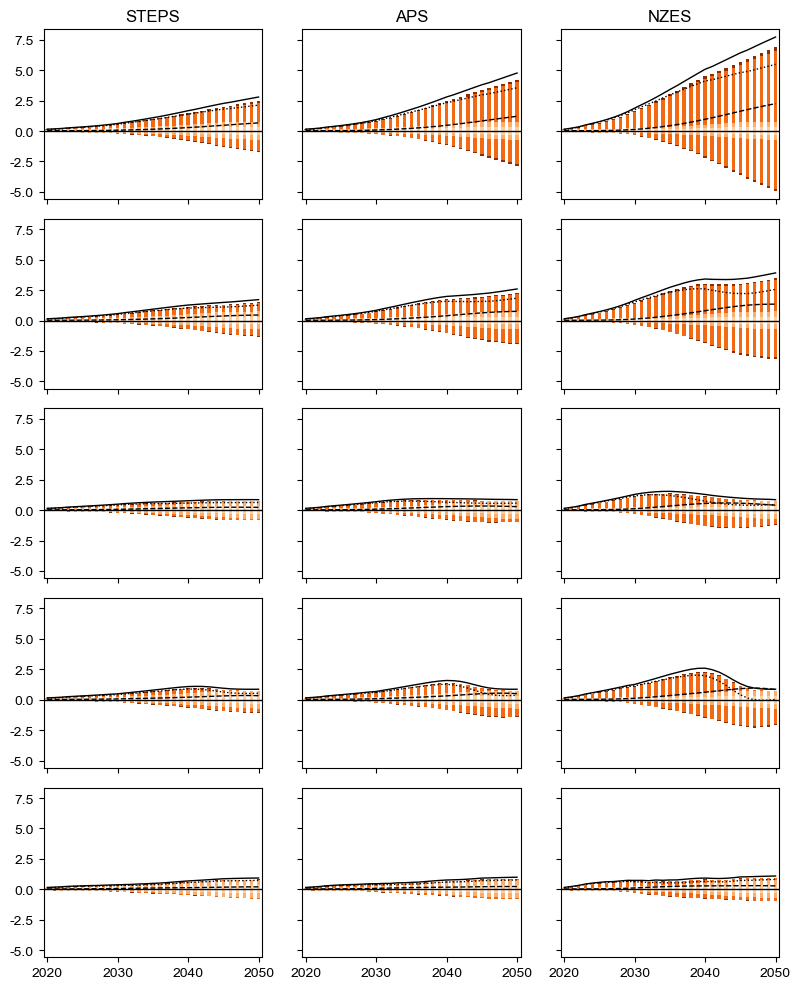

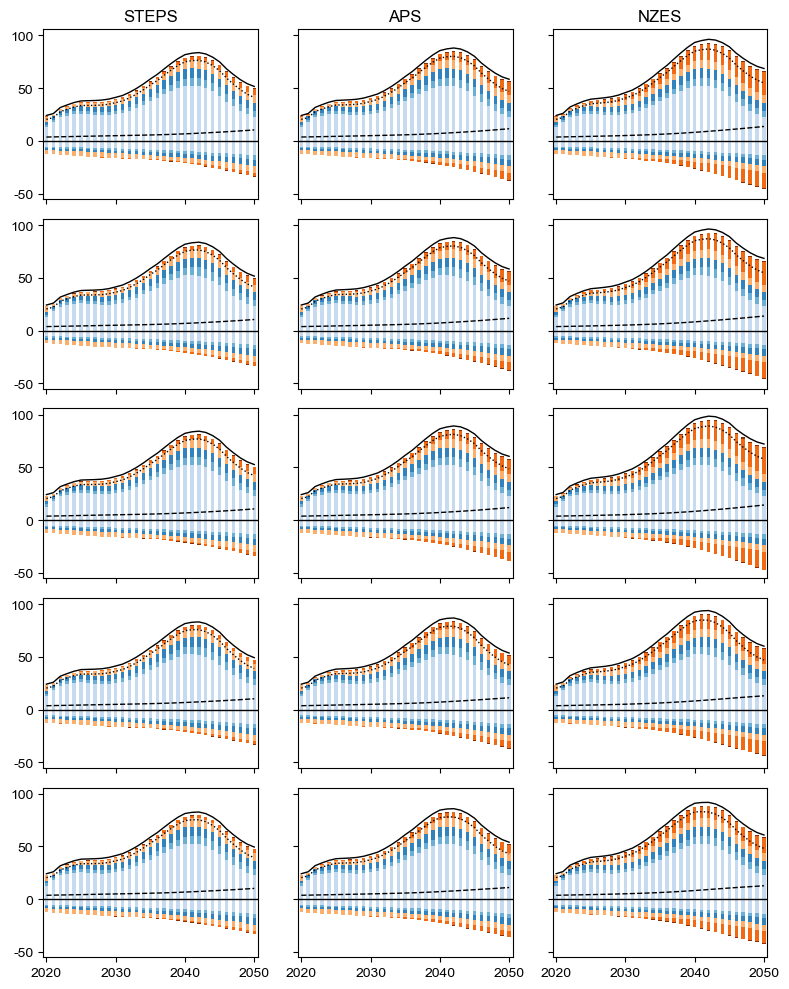

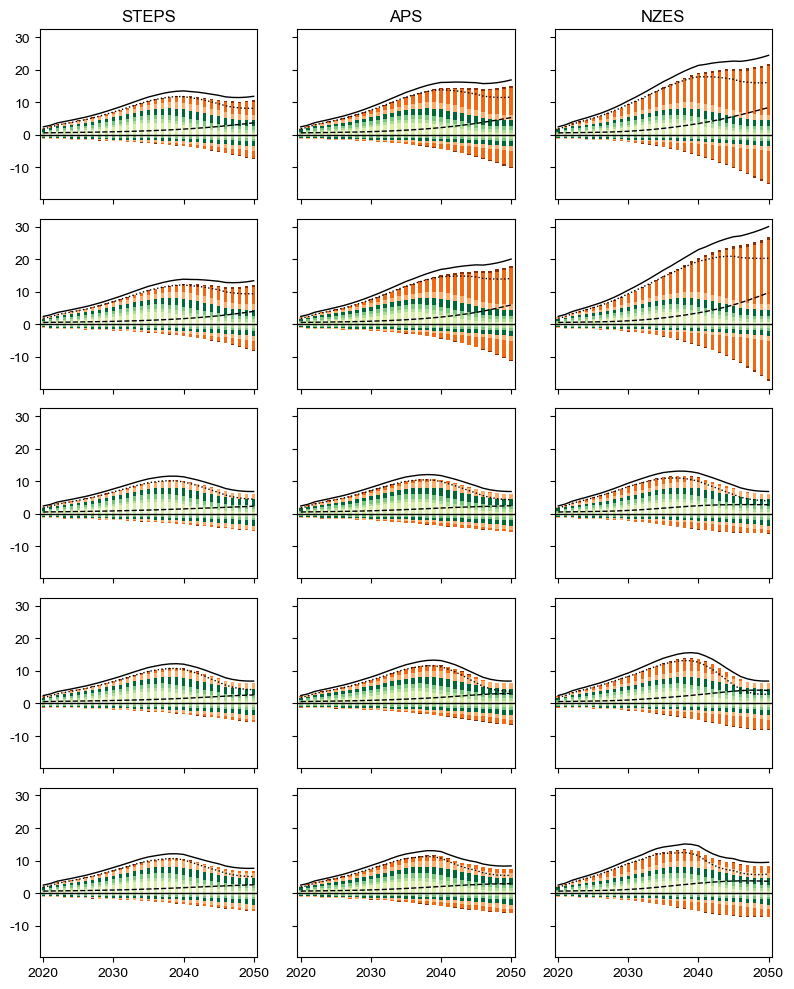

In [38]:
def plot_flow_for_a_scenario(ax, df_inflow, df_outflow, material):
    
    ################### inflow by sector
    if material == 'Copper':
        Agg_Sectors = Cu_Agg_Sectors
        Agg_Sector_Colors = Cu_Agg_Sector_Colors
    elif material == 'Nickel':
        Agg_Sectors = Ni_Agg_Sectors
        Agg_Sector_Colors = Ni_Agg_Sector_Colors
    elif material == 'Cobalt':
        Agg_Sectors = Co_Agg_Sectors
        Agg_Sector_Colors = Co_Agg_Sector_Colors

    df_s_i = df_inflow[material].T.groupby(['Sector']).sum().T
    df_s_i['X'] = np.arange(0, 2050-Year_Min+1)
    df_s_i = df_s_i / 1000  # from kt to Mt
    df_s_i.plot.bar(ax=ax, x='X', xticks=np.arange(0,2050-Year_Min+1,10), y=Agg_Sectors, color=Agg_Sector_Colors, stacked=True, legend=False)
            
    ################### outflow by sector
    df_s_o = - df_outflow[material].T.groupby(['Sector']).sum().T
    df_s_o['X'] = np.arange(0, 2050-Year_Min+1)
    df_s_o = df_s_o / 1000  # from kt to Mt
    df_s_o.plot.bar(ax=ax, x='X', xticks=np.arange(0,2050-Year_Min+1,10), xlabel='', y=Agg_Sectors, color=Agg_Sector_Colors, stacked=True, legend=False)

    #ax.set_ylabel('Global  '+ material + ' inflows (Mt)')
    ax.set_xticklabels(np.arange(Year_Min,2051,10), rotation='horizontal')
    ax.tick_params(axis='x', labelrotation=0)
    ax.axhline(0, color='k', lw=1)
    #if material == 'Cobalt':
        #ax.set_ylim(0,8)
            
            
def plot_supply_balance_for_a_scenario(ax, df_s_demand, df_pri_s_p, material):
    
    df_s_demand = df_s_demand.copy()
    df_s_demand.reset_index(inplace=True, drop=True)
    
    df_pri_s_p = df_pri_s_p.copy()
    df_pri_s_p.reset_index(inplace=True, drop=True)
    
    lw = 1
    ax.plot(df_s_demand.index, (df_s_demand[material+'_Primary']+df_s_demand[material+'_Secondary'])/1000, 
            label='Total supply', lw=lw, color='k', linestyle='-')  #DC3794
    ax.plot(df_s_demand.index, df_s_demand[material+'_Primary'] / 1000, label='Primary supply', 
            lw=lw, color='k', linestyle=':')
    ax.plot(df_s_demand.index, df_s_demand[material+'_Secondary'] / 1000, label='Secondary supply', 
            lw=lw, color='k', linestyle='--') 
        

def plot_flow_for_scenarios(material):
    
    df_cum_primary_supply = pd.DataFrame(index=Battery_Scenarios, columns=IEA_Scenarios)
    df_cum_secondary_supply = df_cum_primary_supply.copy()
    
    if material == 'Cobalt':
        df_cum_cobalt_supply = pd.DataFrame(index=Battery_Scenarios, 
                                            columns=pd.MultiIndex.from_product([Mining_Scenarios, IEA_Scenarios], 
                                                                              names=['Mining Scenario','IEA Scenario']))
    
    fig, axes = plt.subplots(len(Battery_Scenarios),len(IEA_Scenarios), figsize=(8,10), sharex=True, sharey=True)
    
    for i, b_sce in enumerate(Battery_Scenarios):
        for j, iea_sce in enumerate(IEA_Scenarios):
            
            lt='Constant'
            seg_sce='Baseline'
            b_size='Larger'
            
            df_all_sector_inflow = extract_all_sectors(flow='Inflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
            df_all_sector_inflow_2 = reconstruct_sector(df_all_sector_inflow)
            
            df_all_sector_outflow = extract_all_sectors(flow='Outflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
            df_all_sector_outflow_2 = reconstruct_sector(df_all_sector_outflow)
            #df_all_sector_stock = extract_all_sectors(flow='Stock', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
            #df_all_sector_stock_2 = reconstruct_sector(df_all_sector_stock)
            df_s_demand = cal_all_metal_demand(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='Constant', process_sce='Constant')            
            df_pri_s_p = cal_cobalt_primary_supply(df_Primary_Baseline, df_s_demand)
            
            ## fill in cum supply
            df_cum_primary_supply.at[b_sce, iea_sce] = df_s_demand.loc[2020:, material+'_Primary'].sum() / 1000  ## from kt to Mt
            df_cum_secondary_supply.at[b_sce, iea_sce] = df_s_demand.loc[2020:, material+'_Secondary'].sum() / 1000  ## from kt to Mt
            
            if material == 'Cobalt':
                for mining_sce in Mining_Scenarios:
                    df_cum_cobalt_supply.at[b_sce, (mining_sce,iea_sce)] = df_pri_s_p.loc[2020:, (mining_sce,'Total')].sum() / 1000 ## from kt to Mt
            
            plot_flow_for_a_scenario(axes[i,j], df_all_sector_inflow_2, df_all_sector_outflow_2, material)
            plot_supply_balance_for_a_scenario(axes[i,j], df_s_demand, df_pri_s_p, material)
            
            axes[i,j].set_xlabel('')
            
            if i == 0:
                axes[i,j].set_title(iea_sce)
            #if j == 0:
                #axes[i, j].annotate(b_sce, xy=(-0.2, 0.5), xycoords='axes fraction', 
                                    #ha='right', va='center', fontsize=axes[i, 0].title.get_fontsize(), rotation=90)
                
    #为最后一个子图添加 legend
    #handles, labels = axes[-1,-1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.02), frameon=False)
    
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Baseline\Baseline_Fig2_'+material+'.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Baseline/Baseline_Fig2_'+material+'.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
    

## unit: Mt
plot_flow_for_scenarios(material='Cobalt')
plot_flow_for_scenarios(material='Copper')
plot_flow_for_scenarios(material='Nickel')

#### Plot cummulative

In [39]:
def extract_cum_supply_demand():
    
    df_cum_primary_supply = pd.DataFrame(index=pd.MultiIndex.from_product([IEA_Scenarios,Battery_Scenarios],
                                                                          names=['IEA Scenarios','Battery_Scenarios']),
                                        columns=Materials)
    df_cum_secondary_supply = df_cum_primary_supply.copy()
    df_cum_inflow = pd.DataFrame(index=pd.MultiIndex.from_product([IEA_Scenarios,Battery_Scenarios],
                                                                          names=['IEA Scenarios','Battery_Scenarios']),
                                        columns=pd.MultiIndex.from_product([Materials,Agg_Sectors],
                                                                          names=['Material','Sector']))
    
    for iea_sce in IEA_Scenarios:
        for b_sce in Battery_Scenarios:
        
            lt='Constant'
            seg_sce='Baseline'
            b_size='Larger'
            
            df_all_sector_inflow = extract_all_sectors(flow='Inflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
            df_all_sector_inflow_2 = reconstruct_sector(df_all_sector_inflow)
            
            df_all_sector_outflow = extract_all_sectors(flow='Outflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
            df_all_sector_outflow_2 = reconstruct_sector(df_all_sector_outflow)
            
            df_s_demand = cal_all_metal_demand(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='Constant', process_sce='Constant')            
            #df_pri_s_p = cal_cobalt_primary_supply(df_Primary_Baseline, df_s_demand)
            
            ## fill in cum supply / demand
            for material in Materials:
                
                for sector in Agg_Sectors:
                    if sector in df_all_sector_inflow_2[material].columns:
                        df_cum_inflow.at[(iea_sce,b_sce),(material,sector)] = df_all_sector_inflow_2[material].T.groupby('Sector').sum().T[sector].sum() / 1000 ## from kt to Mt
                df_cum_inflow.fillna(value=0, inplace=True)
                
                df_cum_primary_supply.at[(iea_sce,b_sce),material] = df_s_demand.loc[2020:, material+'_Primary'].sum() / 1000  ## from kt to Mt
                df_cum_secondary_supply.at[(iea_sce,b_sce),material] = df_s_demand.loc[2020:, material+'_Secondary'].sum() / 1000  ## from kt to Mt
                

    return df_cum_inflow, df_cum_primary_supply, df_cum_secondary_supply


## unit: Mt
df_base_cum_inflow, df_base_cum_primary_supply, df_base_cum_secondary_supply = extract_cum_supply_demand()
df_base_cum_inflow.loc['APS',:]

C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\1885993689.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cum_inflow.fillna(value=0, inplace=True)
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\1885993689.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.76535508126535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cum_inflow.at[(iea_sce,b_sce),(material,sector)] = df_all_sector_inflow_2[material].T.groupby('Sector').sum().T[sector].sum() / 1000 ## from kt to Mt
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_33424\1885993689.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a 

Material                                         Cobalt                 \
Sector                        Building & Infrastructure Transportation   
Battery_Scenarios                                                        
NCX high cobalt                                       0              0   
NCX low cobalt                                        0              0   
LFP development                                       0              0   
Li-S/Air development                                  0              0   
Low Cobalt/Nickel development                         0              0   

Material                                                                 \
Sector                        Industrial Equipment Metal Goods & Others   
Battery_Scenarios                                                         
NCX high cobalt                                  0             5.533252   
NCX low cobalt                                   0             5.533252   
LFP development                                  0             5.533252   
Li-S/Air development                             0             5.533252   
Low Cobalt/Nickel development                    0             5.533252   

Material                                                      \
Sector                            B-CEs      B-EVs     B-ESS   
Battery_Scenarios                                              
NCX high cobalt                6.895551  39.936485  3.639947   
NCX low cobalt                 6.895551  23.158595  2.285570   
LFP development                6.895551   6.507881  0.857258   
Li-S/Air development           6.895551  10.802794  1.261102   
Low Cobalt/Nickel development  6.895551   3.448819  0.457841   

Material                                         Nickel                 \
Sector                        Building & Infrastructure Transportation   
Battery_Scenarios                                                        
NCX high cobalt                               59.765355      26.335789   
NCX low cobalt                                59.765355      26.335789   
LFP development                               59.765355      26.335789   
Li-S/Air development                          59.765355      26.335789   
Low Cobalt/Nickel development                 59.765355      26.335789   

Material                                            ...             \
Sector                        Industrial Equipment  ...      B-CEs   
Battery_Scenarios                                   ...              
NCX high cobalt                          33.993135  ...  41.954393   
NCX low cobalt                           33.993135  ...  41.954393   
LFP development                          33.993135  ...  41.954393   
Li-S/Air development                     33.993135  ...  41.954393   
Low Cobalt/Nickel development            33.993135  ...  41.954393   

Material                                              \
Sector                              B-EVs      B-ESS   
Battery_Scenarios                                      
NCX high cobalt                 95.085040   8.455113   
NCX low cobalt                 116.315739  10.073703   
LFP development                 14.349246   1.890170   
Li-S/Air development            23.819111   2.780606   
Low Cobalt/Nickel development   28.688521   3.228608   

Material                                         Copper                 \
Sector                        Building & Infrastructure Transportation   
Battery_Scenarios                                                        
NCX high cobalt                             1035.949094     150.486691   
NCX low cobalt                              1035.949094     150.486691   
LFP development                             1035.949094     150.486691   
Li-S/Air development                        1035.949094     150.486691   
Low Cobalt/Nickel development               1035.949094     150.486691   

Material                                                                 \
Sector                

In [40]:
df_base_cum_inflow.loc['APS',('Cobalt','B-EVs')] / df_base_cum_inflow.loc['APS','Cobalt'].sum(axis=1)

Battery_Scenarios
NCX high cobalt                  0.713085
NCX low cobalt                   0.611481
LFP development                  0.328781
Li-S/Air development             0.441062
Low Cobalt/Nickel development    0.211125
dtype: float64

In [41]:
df_base_cum_inflow.loc['APS',('Nickel','B-EVs')] / df_base_cum_inflow.loc['APS','Nickel'].sum(axis=1)

Battery_Scenarios
NCX high cobalt                  0.302888
NCX low cobalt                   0.345378
LFP development                  0.063316
Li-S/Air development             0.100508
Low Cobalt/Nickel development    0.118398
dtype: float64

In [42]:
df_base_cum_inflow.loc['APS',('Copper','B-EVs')] / df_base_cum_inflow.loc['APS','Copper'].sum(axis=1)

Battery_Scenarios
NCX high cobalt                  0.086498
NCX low cobalt                   0.086032
LFP development                  0.095502
Li-S/Air development             0.071614
Low Cobalt/Nickel development    0.069558
dtype: float64

In [43]:
df_base_cum_primary_supply.to_excel('df_base_cum_primary_supply.xlsx')
df_base_cum_primary_supply.loc['APS',:]

,Cobalt,Nickel,Copper
Battery_Scenarios,,,
NCX high cobalt,51.417794,290.102607,1584.60723
NCX low cobalt,33.684951,312.824585,1583.619191
LFP development,16.956766,209.087668,1602.365185
Li-S/Air development,20.62604,216.30228,1554.493272
Low Cobalt/Nickel development,14.774846,221.957997,1550.982893


In [44]:
df_base_cum_secondary_supply.loc['APS',:]

,Cobalt,Nickel,Copper
Battery_Scenarios,,,
NCX high cobalt,11.751166,61.32941,202.187583
NCX low cobalt,9.133542,64.16755,202.197749
LFP development,5.571013,44.686342,203.847792
Li-S/Air development,7.175315,49.061155,201.435152
Low Cobalt/Nickel development,3.871361,49.353697,200.68324


In [45]:
df_base_cum_primary_supply.loc['APS',:] + df_base_cum_secondary_supply.loc['APS',:]

,Cobalt,Nickel,Copper
Battery_Scenarios,,,
NCX high cobalt,63.16896,351.432018,1786.794813
NCX low cobalt,42.818493,376.992134,1785.81694
LFP development,22.527778,253.77401,1806.212977
Li-S/Air development,27.801355,265.363435,1755.928424
Low Cobalt/Nickel development,18.646208,271.311694,1751.666133


In [46]:
df_base_cum_secondary_supply.loc['APS',:] / (df_base_cum_primary_supply.loc['APS',:] + df_base_cum_secondary_supply.loc['APS',:])

,Cobalt,Nickel,Copper
Battery_Scenarios,,,
NCX high cobalt,0.186028,0.174513,0.113157
NCX low cobalt,0.213308,0.170209,0.113224
LFP development,0.247295,0.176087,0.112859
Li-S/Air development,0.258092,0.184883,0.114717
Low Cobalt/Nickel development,0.207622,0.181908,0.114567


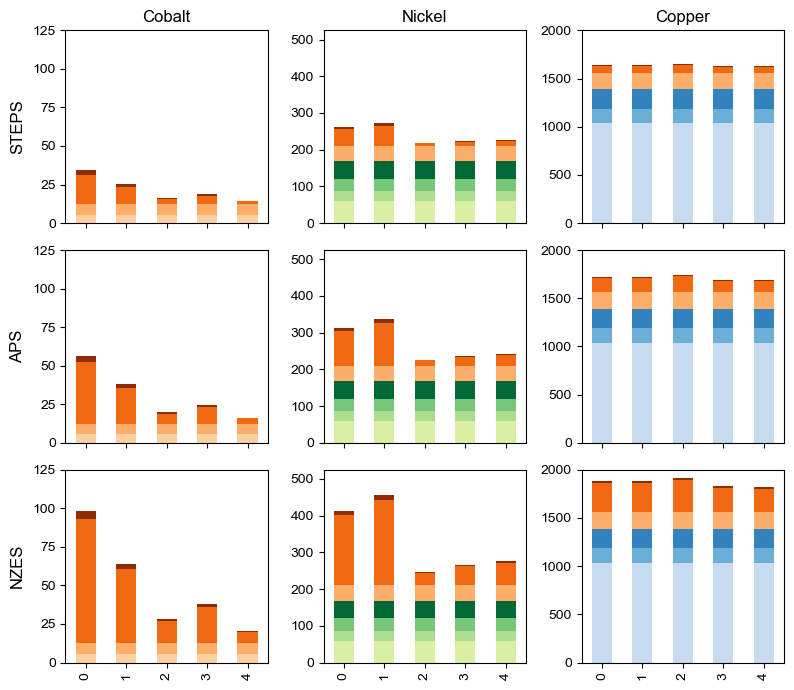

In [47]:
def plot_cum_inflow(df):
    
    fig, axes = plt.subplots(3,3, figsize=(8,7), sharex=True)
    
    for i, iea_sce in enumerate(IEA_Scenarios):
        for j, material in enumerate(Materials):
            
            if material == 'Copper':
                Agg_Sectors = Cu_Agg_Sectors
                Agg_Sector_Colors = Cu_Agg_Sector_Colors
            elif material == 'Nickel':
                Agg_Sectors = Ni_Agg_Sectors
                Agg_Sector_Colors = Ni_Agg_Sector_Colors
            elif material == 'Cobalt':
                Agg_Sectors = Co_Agg_Sectors
                Agg_Sector_Colors = Co_Agg_Sector_Colors

            df_plot = df.loc[(iea_sce),(material)]
            df_plot = df_plot[Agg_Sectors]
            df_plot['X'] = np.arange(0, len(Battery_Scenarios))
            df_plot.plot.bar(ax=axes[i,j], x='X', y=Agg_Sectors, color=Agg_Sector_Colors, stacked=True, legend=False)
            
            if material == 'Copper':
                axes[i,j].set_ylim(0,2000)
            elif material == 'Nickel':
                axes[i,j].set_ylim(0,525)
                axes[i,j].set_yticks([0, 100, 200, 300, 400, 500])
            elif material == 'Cobalt':
                axes[i,j].set_ylim(0,125)
                
            #axes[i,j].set_xticklabels(Battery_Scenarios)  # 设置刻度标签
            axes[i,j].set_xlabel('')
            
            if i == 0:
                axes[i,j].set_title(material)
            if j == 0:
                axes[i,j].annotate(iea_sce, xy=(-0.2, 0.5), xycoords='axes fraction', 
                                    ha='right', va='center', fontsize=axes[i, 0].title.get_fontsize(), rotation=90)
                
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Baseline\Baseline_All_Cum_Inflow.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Baseline/Baseline_All_Cum_Inflow.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
    
    
plot_cum_inflow(df_base_cum_inflow)

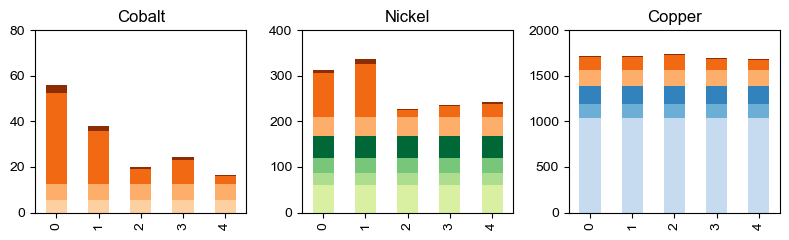

In [48]:
def plot_cum_inflow(df):
    
    fig, axes = plt.subplots(1,3, figsize=(8,2.5), sharex=True)
    
    iea_sce = 'APS'
    for j, material in enumerate(Materials):

        if material == 'Copper':
            Agg_Sectors = Cu_Agg_Sectors
            Agg_Sector_Colors = Cu_Agg_Sector_Colors
            axes[j].set_ylim(0,2000)
        elif material == 'Nickel':
            Agg_Sectors = Ni_Agg_Sectors
            Agg_Sector_Colors = Ni_Agg_Sector_Colors
            axes[j].set_ylim(0,400)
        elif material == 'Cobalt':
            axes[j].set_ylim(0,80)
            axes[j].set_yticks([0,20,40,60,80])
            Agg_Sectors = Co_Agg_Sectors
            Agg_Sector_Colors = Co_Agg_Sector_Colors
            
        df_plot = df.loc[(iea_sce),(material)]
        df_plot = df_plot[Agg_Sectors]
        df_plot['X'] = np.arange(0, len(Battery_Scenarios))
        df_plot.plot.bar(ax=axes[j], x='X', y=Agg_Sectors, color=Agg_Sector_Colors, stacked=True, legend=False)

        #axes[j].set_xticklabels(Battery_Scenarios)  # 设置刻度标签
        axes[j].set_xlabel('')
        axes[j].set_title(material)
        
       
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Baseline\Baseline_APS_Cum_Inflow.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Baseline/Baseline_APS_Cum_Inflow.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
    
    
plot_cum_inflow(df_base_cum_inflow)

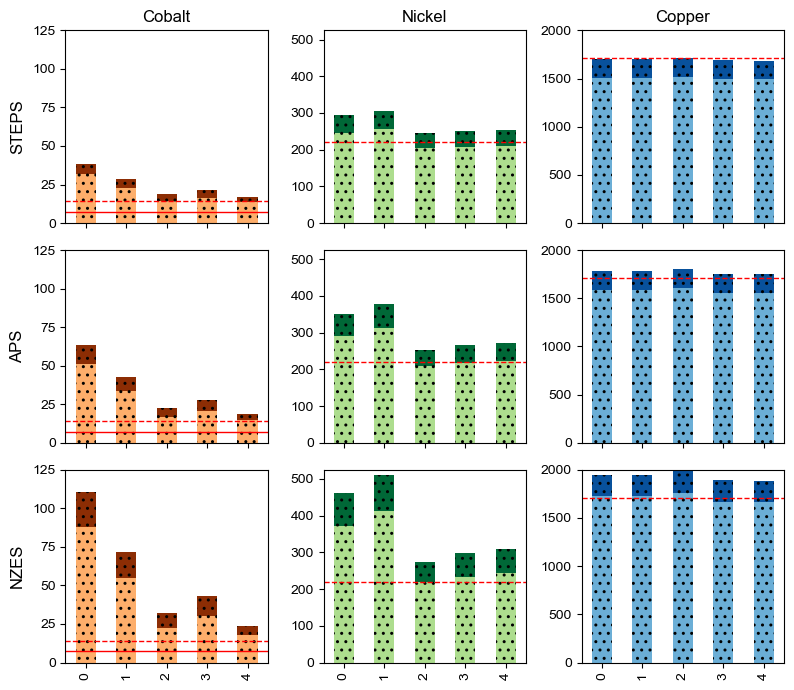

In [49]:
def plot_cum_supply(df_pri, df_sec):
    
    fig, axes = plt.subplots(3,3, figsize=(8,7), sharex=True)
    
    for i, iea_sce in enumerate(IEA_Scenarios):
        for j, material in enumerate(Materials):
            if material == 'Copper':
                Colors = ['#6BAED6','#08519C']
            elif material == 'Nickel':
                Colors = ['#ADDD8E','#006837']
            elif material == 'Cobalt':
                Colors = ['#FDAE6B','#8C2D04']
                
            df_plot = pd.DataFrame(index=Battery_Scenarios, columns=['Primary','Secondary'])
            df_plot.Primary = df_pri.loc[(iea_sce),(material)]
            df_plot.Secondary = df_sec.loc[(iea_sce),(material)]
            
            df_plot['X'] = np.arange(0, len(Battery_Scenarios))
            df_plot.plot.bar(ax=axes[i,j], x='X', color=Colors, stacked=True, legend=False, hatch='..')
            
            if material == 'Copper':
                axes[i,j].set_ylim(0,2000)
                Cu_reserve = 1711.216062  ## Mt
                axes[i,j].axhline(Cu_reserve, color='r', lw=1, linestyle='--')
            elif material == 'Nickel':
                axes[i,j].set_ylim(0,525)
                axes[i,j].set_yticks([0, 100, 200, 300, 400, 500])
                Ni_reserve = 219.848463  ## Mt
                axes[i,j].axhline(Ni_reserve, color='r', lw=1, linestyle='--')
            elif material == 'Cobalt':
                axes[i,j].set_ylim(0,125)
                Co_reserve = 14.061897    ## Mt
                axes[i,j].axhline(Co_reserve, color='r', lw=1, linestyle='--')
                Co_pri_supply_SP = 7.3083112492543  ## Mt
                axes[i,j].axhline(Co_pri_supply_SP, color='r', lw=1, linestyle='-')
                
            #axes[i,j].set_xticklabels(Battery_Scenarios)  # 设置刻度标签
            axes[i,j].set_xlabel('')
                
            if i == 0:
                axes[i,j].set_title(material)
            if j == 0:
                axes[i,j].annotate(iea_sce, xy=(-0.2, 0.5), xycoords='axes fraction', 
                                    ha='right', va='center', fontsize=axes[i, 0].title.get_fontsize(), rotation=90)
                
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Baseline\Baseline_All_Cum_Supply.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Baseline/Baseline_All_Cum_Supply.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
            
        
plot_cum_supply(df_base_cum_primary_supply, df_base_cum_secondary_supply)

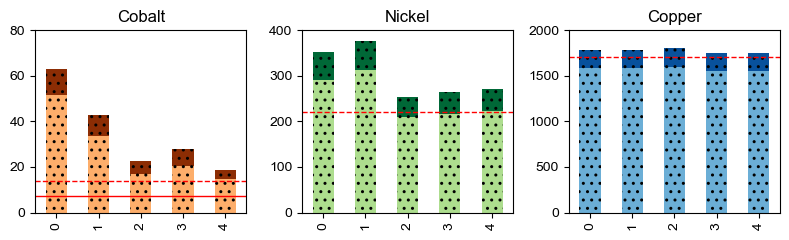

In [50]:
def plot_cum_supply(df_pri, df_sec):
    
    fig, axes = plt.subplots(1,3, figsize=(8,2.5), sharex=True)
    
    iea_sce = 'APS'
    for j, material in enumerate(Materials):
        if material == 'Copper':
            Colors = ['#6BAED6','#08519C']
        elif material == 'Nickel':
            Colors = ['#ADDD8E','#006837']
        elif material == 'Cobalt':
            Colors = ['#FDAE6B','#8C2D04']

        df_plot = pd.DataFrame(index=Battery_Scenarios, columns=['Primary','Secondary'])
        df_plot.Primary = df_pri.loc[(iea_sce),(material)]
        df_plot.Secondary = df_sec.loc[(iea_sce),(material)]

        df_plot['X'] = np.arange(0, len(Battery_Scenarios))
        df_plot.plot.bar(ax=axes[j], x='X', color=Colors, stacked=True, legend=False, hatch='..')

        if material == 'Copper':
            axes[j].set_ylim(0,2000)
            Cu_reserve = 1711.216062  ## Mt
            axes[j].axhline(Cu_reserve, color='r', lw=1, linestyle='--')
        elif material == 'Nickel':
            axes[j].set_ylim(0,400)
            axes[j].set_yticks([0, 100, 200, 300, 400])
            Ni_reserve = 219.848463  ## Mt
            axes[j].axhline(Ni_reserve, color='r', lw=1, linestyle='--')
        elif material == 'Cobalt':
            axes[j].set_ylim(0,80)
            axes[j].set_yticks([0,20,40,60,80])
            Co_reserve = 14.061897    ## Mt
            axes[j].axhline(Co_reserve, color='r', lw=1, linestyle='--')
            Co_pri_supply_SP = 7.3083112492543  ## Mt
            axes[j].axhline(Co_pri_supply_SP, color='r', lw=1, linestyle='-')

        #axes[j].set_xticklabels(Battery_Scenarios)  # 设置刻度标签
        axes[j].set_xlabel('')
        axes[j].set_title(material)
    
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Baseline\Baseline_APS_Cum_Supply.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Baseline/Baseline_APS_Cum_Supply.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
            
        
plot_cum_supply(df_base_cum_primary_supply, df_base_cum_secondary_supply)

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
hours = execution_time // 3600 
minutes = (execution_time % 3600) // 60 
seconds = execution_time % 60 

print(f"代码运行时间: {int(hours)}小时 {int(minutes)}分钟 {int(seconds)}秒")

代码运行时间: 0小时 1分钟 47秒
